In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.stats import shapiro, probplot, ttest_ind, pearsonr
from pathlib import Path


In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("s3programmer/disease-diagnosis-dataset")

print("Path to dataset files:", path)

100%|██████████| 32.8k/32.8k [00:00<00:00, 23.5MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/s3programmer/disease-diagnosis-dataset/versions/1


In [5]:
dataset_path = Path(path)
print(f"Путь к датасету: {dataset_path}")

Путь к датасету: /root/.cache/kagglehub/datasets/s3programmer/disease-diagnosis-dataset/versions/1


In [52]:
from pathlib import Path

dataset_path = Path("/root/.cache/kagglehub/datasets/s3programmer/disease-diagnosis-dataset/versions/1")

print("Содержимое:")
print(f"Путь: {dataset_path}")
print()

if not dataset_path.exists():
    print("путь не существует")
else:
    items = list(dataset_path.iterdir())

    if not items:
        print("Директория пуста")
    else:
        files = [item for item in items if item.is_file()]

        if files:
            print("Файлы:")
            for file in files:
                print(f"  {file.name}")
        else:
            print("Файлы не найдены")


Содержимое:
Путь: /root/.cache/kagglehub/datasets/s3programmer/disease-diagnosis-dataset/versions/1

Файлы:
  disease_diagnosis.csv


In [8]:
csv_file = dataset_path / "disease_diagnosis.csv"

df = pd.read_csv(csv_file)
rows, cols = df.shape

print(f"Строк: {rows}")
print(f"Столбцов: {cols}")

Строк: 2000
Столбцов: 13


In [9]:
df = pd.read_csv(csv_file)

print("Названия столбцов:")
for i, column in enumerate(df.columns, 1):
    print(f"{i:2d}. {column}")

Названия столбцов:
 1. Patient_ID
 2. Age
 3. Gender
 4. Symptom_1
 5. Symptom_2
 6. Symptom_3
 7. Heart_Rate_bpm
 8. Body_Temperature_C
 9. Blood_Pressure_mmHg
10. Oxygen_Saturation_%
11. Diagnosis
12. Severity
13. Treatment_Plan


In [11]:
for column in df.columns:
    dtype = df[column].dtype
    print(f"{column} : {dtype}")

Patient_ID : int64
Age : int64
Gender : object
Symptom_1 : object
Symptom_2 : object
Symptom_3 : object
Heart_Rate_bpm : int64
Body_Temperature_C : float64
Blood_Pressure_mmHg : object
Oxygen_Saturation_% : int64
Diagnosis : object
Severity : object
Treatment_Plan : object


In [12]:
display(df.head())

,Patient_ID,Age,Gender,Symptom_1,Symptom_2,Symptom_3,Heart_Rate_bpm,Body_Temperature_C,Blood_Pressure_mmHg,Oxygen_Saturation_%,Diagnosis,Severity,Treatment_Plan
0,1,74,Male,Fatigue,Sore throat,Fever,69,39.4,132/91,94,Flu,Moderate,Medication and rest
1,2,66,Female,Sore throat,Fatigue,Cough,95,39.0,174/98,98,Healthy,Mild,Rest and fluids
2,3,32,Male,Body ache,Sore throat,Fatigue,77,36.8,136/60,96,Healthy,Mild,Rest and fluids
3,4,21,Female,Shortness of breath,Headache,Cough,72,38.9,147/82,99,Healthy,Mild,Rest and fluids
4,5,53,Male,Runny nose,Sore throat,Fatigue,100,36.6,109/106,92,Healthy,Mild,Rest and fluids


In [13]:
for column in df.columns:
    null_count = df[column].isnull().sum()
    unique_count = df[column].nunique()
    dtype = df[column].dtype

    print(f"{column}:")
    print(f"  Тип данных: {dtype}")
    print(f"  Пропущенных значений: {null_count}")
    print(f"  Уникальных значений: {unique_count}")
    print()

Patient_ID:
  Тип данных: int64
  Пропущенных значений: 0
  Уникальных значений: 2000

Age:
  Тип данных: int64
  Пропущенных значений: 0
  Уникальных значений: 62

Gender:
  Тип данных: object
  Пропущенных значений: 0
  Уникальных значений: 2

Symptom_1:
  Тип данных: object
  Пропущенных значений: 0
  Уникальных значений: 8

Symptom_2:
  Тип данных: object
  Пропущенных значений: 0
  Уникальных значений: 8

Symptom_3:
  Тип данных: object
  Пропущенных значений: 0
  Уникальных значений: 8

Heart_Rate_bpm:
  Тип данных: int64
  Пропущенных значений: 0
  Уникальных значений: 60

Body_Temperature_C:
  Тип данных: float64
  Пропущенных значений: 0
  Уникальных значений: 46

Blood_Pressure_mmHg:
  Тип данных: object
  Пропущенных значений: 0
  Уникальных значений: 1688

Oxygen_Saturation_%:
  Тип данных: int64
  Пропущенных значений: 0
  Уникальных значений: 10

Diagnosis:
  Тип данных: object
  Пропущенных значений: 0
  Уникальных значений: 5

Severity:
  Тип данных: object
  Пропущенны

Количество записей: 2000
Средний возраст: 48.3 лет
Медианный возраст: 49.0 лет
Стандартное отклонение: 17.4 лет
Минимальный возраст: 18 лет
Максимальный возраст: 79 лет
Пропущенные значения: 0


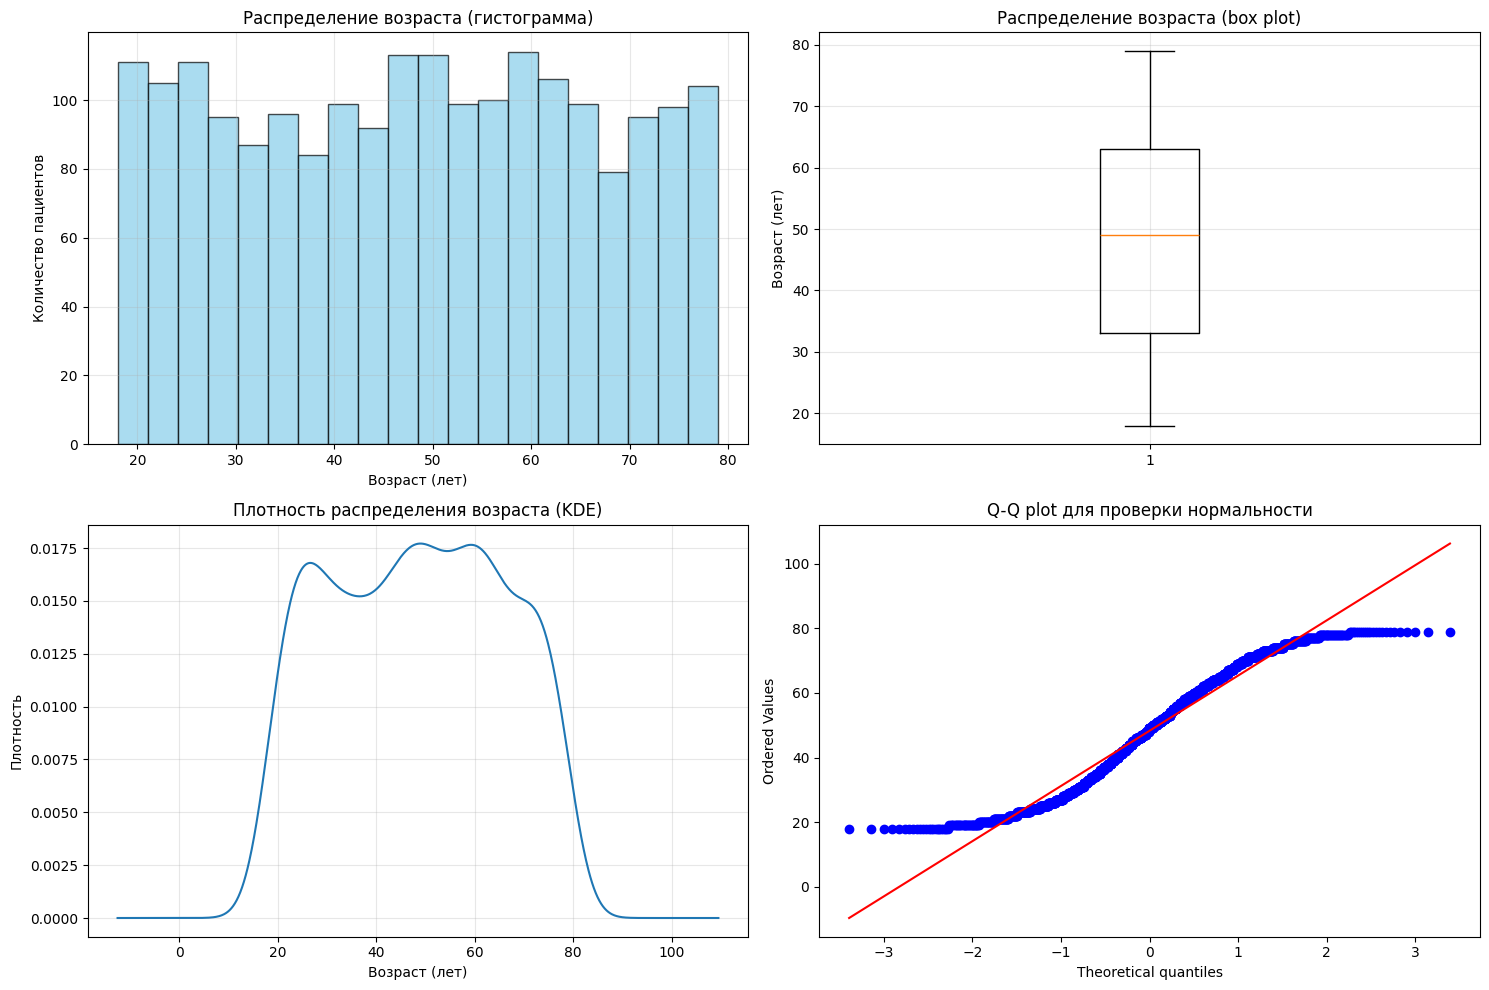


Тест Шапиро-Уилка на нормальность:
Статистика: 0.9583
p-value: 0.0000
Распределение отличается от нормального (p <= 0.05)
Коэффициент вариации: 0.361
Эксцесс: -1.160
Асимметрия: -0.009


In [17]:
print(f"Количество записей: {len(df)}")
print(f"Средний возраст: {df['Age'].mean():.1f} лет")
print(f"Медианный возраст: {df['Age'].median():.1f} лет")
print(f"Стандартное отклонение: {df['Age'].std():.1f} лет")
print(f"Минимальный возраст: {df['Age'].min()} лет")
print(f"Максимальный возраст: {df['Age'].max()} лет")
print(f"Пропущенные значения: {df['Age'].isnull().sum()}")

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# гистограмма
axes[0, 0].hist(df['Age'], bins=20, edgecolor='black', alpha=0.7, color='skyblue')
axes[0, 0].set_title('Распределение возраста (гистограмма)')
axes[0, 0].set_xlabel('Возраст (лет)')
axes[0, 0].set_ylabel('Количество пациентов')
axes[0, 0].grid(True, alpha=0.3)

# Box plot
axes[0, 1].boxplot(df['Age'])
axes[0, 1].set_title('Распределение возраста (box plot)')
axes[0, 1].set_ylabel('Возраст (лет)')
axes[0, 1].grid(True, alpha=0.3)

# KDE plot
df['Age'].plot.kde(ax=axes[1, 0])
axes[1, 0].set_title('Плотность распределения возраста (KDE)')
axes[1, 0].set_xlabel('Возраст (лет)')
axes[1, 0].set_ylabel('Плотность')
axes[1, 0].grid(True, alpha=0.3)

# QQ plot для проверки нормальности
stats.probplot(df['Age'], dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q plot для проверки нормальности')

plt.tight_layout()
plt.show()

# проверка на нормальность
stat, p_value = shapiro(df['Age'])
print(f"\nТест Шапиро-Уилка на нормальность:")
print(f"Статистика: {stat:.4f}")
print(f"p-value: {p_value:.4f}")

if p_value > 0.05:
    print("Распределение не отличается от нормального (p > 0.05)")
else:
    print("Распределение отличается от нормального (p <= 0.05)")

# равномерности
print(f"Коэффициент вариации: {(df['Age'].std() / df['Age'].mean()):.3f}")
print(f"Эксцесс: {df['Age'].kurtosis():.3f}")
print(f"Асимметрия: {df['Age'].skew():.3f}")

Всего пациентов: 2000
Male: 1000 пациентов (50.0%)
Female: 1000 пациентов (50.0%)


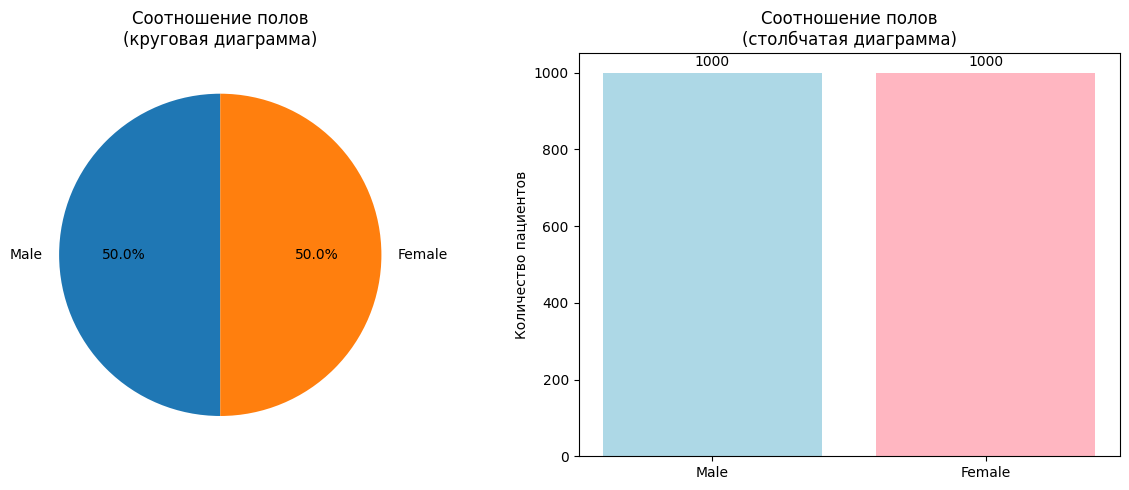

In [18]:
# статистика по полу
gender_counts = df['Gender'].value_counts()
gender_percent = df['Gender'].value_counts(normalize=True) * 100

print(f"Всего пациентов: {len(df)}")
for gender, count in gender_counts.items():
    percent = gender_percent[gender]
    print(f"{gender}: {count} пациентов ({percent:.1f}%)")

# визуализация
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# круговая диаграмма
ax1.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
ax1.set_title('Соотношение полов\n(круговая диаграмма)')

# столбчатая диаграмма
ax2.bar(gender_counts.index, gender_counts.values, color=['lightblue', 'lightpink'])
ax2.set_title('Соотношение полов\n(столбчатая диаграмма)')
ax2.set_ylabel('Количество пациентов')

# подписи значений на столбцах
for i, count in enumerate(gender_counts.values):
    ax2.text(i, count + 10, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

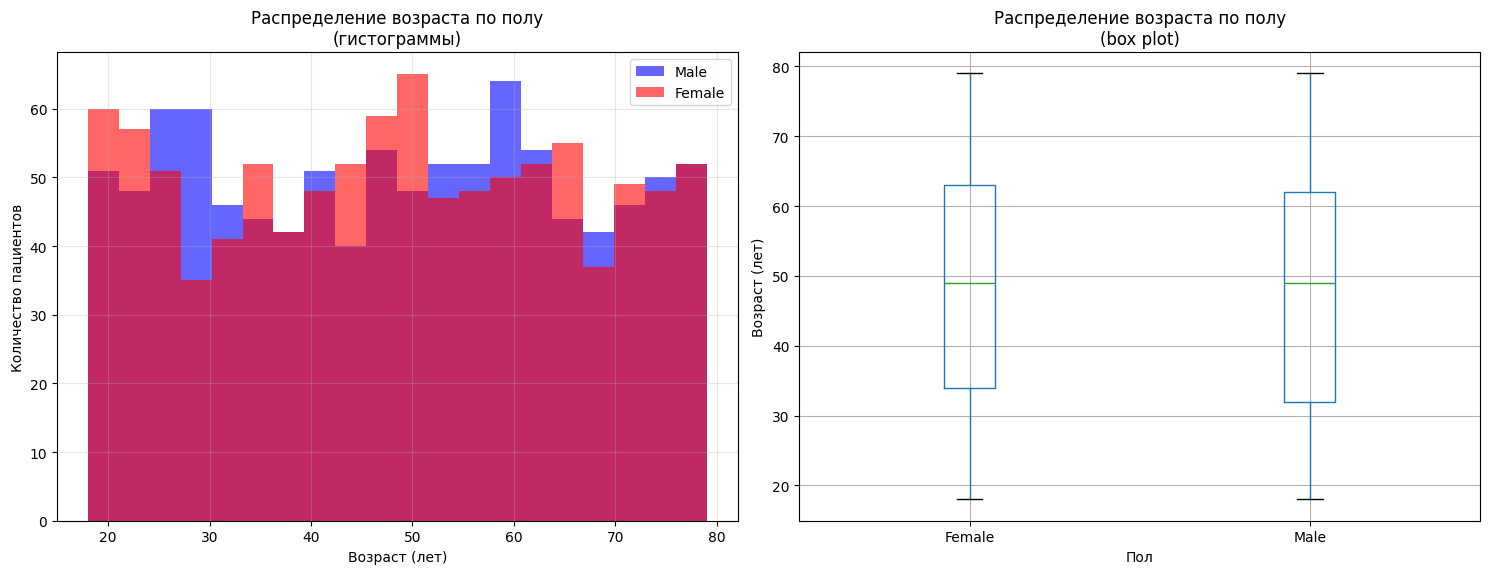


T-test для сравнения средних возрастов:
t-статистика: 0.0616
p-value: 0.9509
Статистически значимых различий в возрасте между группами нет (p > 0.05)


In [21]:
# визуализация
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# гистограммы с наложением
male_data = df[df['Gender'] == 'Male']['Age']
female_data = df[df['Gender'] == 'Female']['Age']

# общие границы для гистограмм
age_range = (df['Age'].min(), df['Age'].max())
bins = 20

axes[0].hist(male_data, bins=bins, alpha=0.6, color='blue', label='Male', range=age_range)
axes[0].hist(female_data, bins=bins, alpha=0.6, color='red', label='Female', range=age_range)
axes[0].set_title('Распределение возраста по полу\n(гистограммы)')
axes[0].set_xlabel('Возраст (лет)')
axes[0].set_ylabel('Количество пациентов')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Box plot
df.boxplot(column='Age', by='Gender', ax=axes[1])
axes[1].set_title('Распределение возраста по полу\n(box plot)')
axes[1].set_xlabel('Пол')
axes[1].set_ylabel('Возраст (лет)')

plt.suptitle('')  # Убираем автоматический заголовок
plt.tight_layout()
plt.show()

# T-test для сравнения средних
t_stat, p_value = ttest_ind(male_data, female_data)

print(f"\nT-test для сравнения средних возрастов:")
print(f"t-статистика: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

if p_value > 0.05:
    print("Статистически значимых различий в возрасте между группами нет (p > 0.05)")
else:
    print("Есть статистически значимые различия в возрасте между группами (p <= 0.05)")

In [22]:
for i in range(1, 4):
    column_name = f'Symptom_{i}'
    unique_values = df[column_name].unique()
    unique_count = df[column_name].nunique()

    print(f"\n{column_name}:")
    print(f"  Количество уникальных значений: {unique_count}")
    print(f"  Уникальные значения: {list(unique_values)}")

    # частота каждого значения
    value_counts = df[column_name].value_counts()
    print(f"  Распределение значений:")
    for value, count in value_counts.items():
        percent = (count / len(df)) * 100
        print(f"    {value}: {count} ({percent:.1f}%)")


Symptom_1:
  Количество уникальных значений: 8
  Уникальные значения: ['Fatigue', 'Sore throat', 'Body ache', 'Shortness of breath', 'Runny nose', 'Headache', 'Cough', 'Fever']
  Распределение значений:
    Runny nose: 261 (13.1%)
    Shortness of breath: 256 (12.8%)
    Body ache: 255 (12.8%)
    Headache: 252 (12.6%)
    Cough: 252 (12.6%)
    Fever: 250 (12.5%)
    Sore throat: 238 (11.9%)
    Fatigue: 236 (11.8%)

Symptom_2:
  Количество уникальных значений: 8
  Уникальные значения: ['Sore throat', 'Fatigue', 'Headache', 'Fever', 'Shortness of breath', 'Cough', 'Runny nose', 'Body ache']
  Распределение значений:
    Fatigue: 293 (14.6%)
    Cough: 288 (14.4%)
    Fever: 254 (12.7%)
    Body ache: 244 (12.2%)
    Runny nose: 240 (12.0%)
    Headache: 237 (11.8%)
    Shortness of breath: 231 (11.6%)
    Sore throat: 213 (10.7%)

Symptom_3:
  Количество уникальных значений: 8
  Уникальные значения: ['Fever', 'Cough', 'Fatigue', 'Runny nose', 'Headache', 'Sore throat', 'Body ache', '

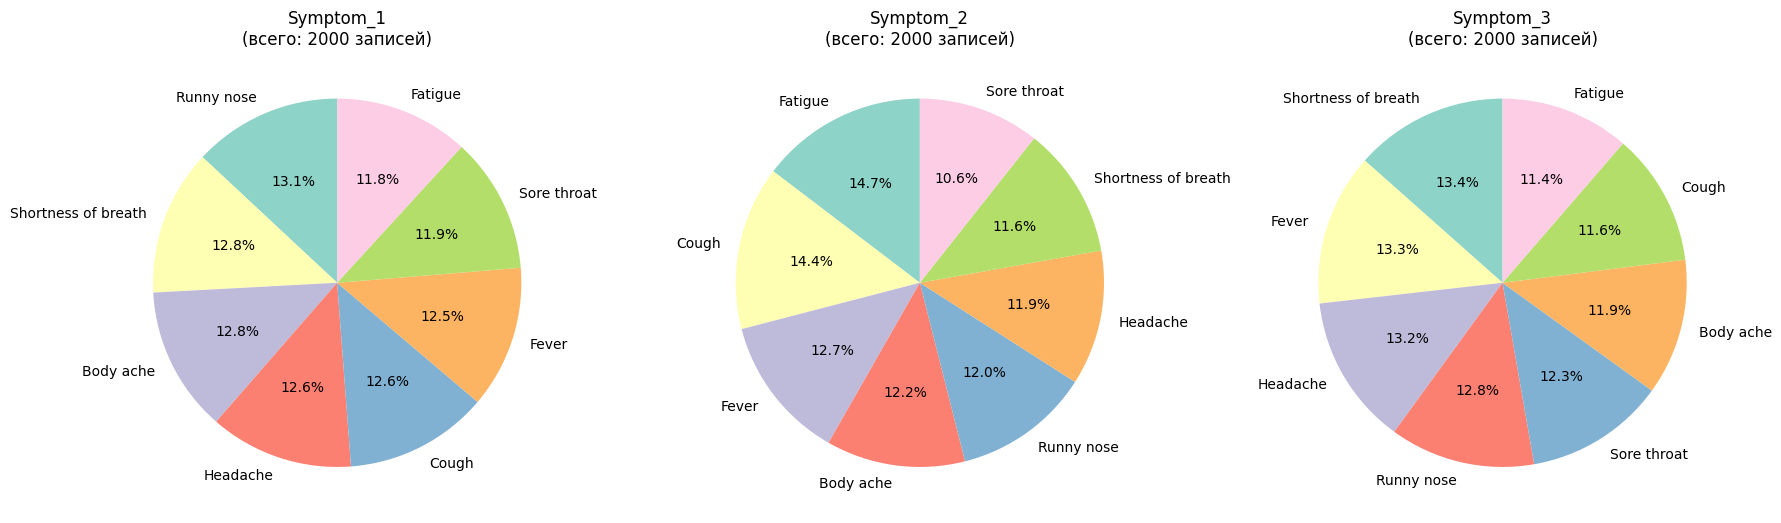

In [23]:
# круговые диаграммы для симптомов
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
# номер =i
for i, ax in enumerate(axes, 1):
    column_name = f'Symptom_{i}'

    value_counts = df[column_name].value_counts()

    wedges, texts, autotexts = ax.pie(value_counts.values,
                                      labels=value_counts.index,
                                      autopct='%1.1f%%',
                                      startangle=90,
                                      colors=plt.cm.Set3.colors)

    ax.set_title(f'{column_name}\n(всего: {len(df)} записей)')

    for autotext in autotexts:
        autotext.set_color('black')
        autotext.set_fontsize(10)

plt.tight_layout()
plt.show()


In [24]:
columns_to_analyze = ['Diagnosis', 'Severity', 'Treatment_Plan']

for column in columns_to_analyze:
    unique_values = df[column].unique()
    unique_count = df[column].nunique()

    print(f"\n{column}:")
    print(f"  уникальных значений: {unique_count}")
    print(f"  значения: {list(unique_values)}")

    # частота каждого значения
    value_counts = df[column].value_counts()
    print(f"  Распределение значений:")
    for value, count in value_counts.items():
        percent = (count / len(df)) * 100
        print(f"    {value}: {count} ({percent:.1f}%)")


Diagnosis:
  уникальных значений: 5
  значения: ['Flu', 'Healthy', 'Bronchitis', 'Cold', 'Pneumonia']
  Распределение значений:
    Healthy: 1167 (58.4%)
    Bronchitis: 334 (16.7%)
    Flu: 292 (14.6%)
    Cold: 163 (8.2%)
    Pneumonia: 44 (2.2%)

Severity:
  уникальных значений: 3
  значения: ['Moderate', 'Mild', 'Severe']
  Распределение значений:
    Mild: 1330 (66.5%)
    Severe: 378 (18.9%)
    Moderate: 292 (14.6%)

Treatment_Plan:
  уникальных значений: 3
  значения: ['Medication and rest', 'Rest and fluids', 'Hospitalization and medication']
  Распределение значений:
    Rest and fluids: 1330 (66.5%)
    Hospitalization and medication: 378 (18.9%)
    Medication and rest: 292 (14.6%)


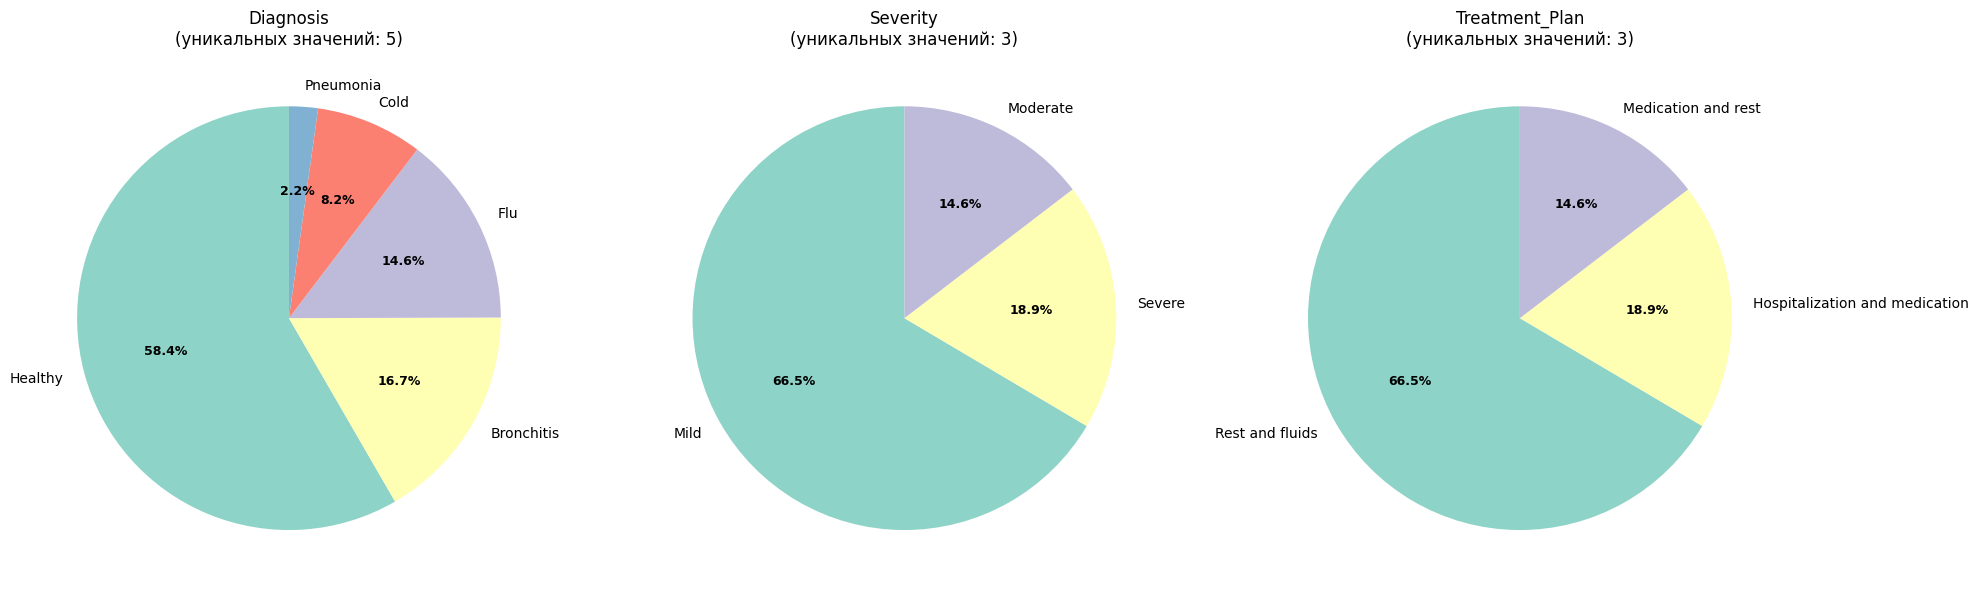

In [26]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
columns_to_plot = ['Diagnosis', 'Severity', 'Treatment_Plan']

for i, (column, ax) in enumerate(zip(columns_to_plot, axes)):
    value_counts = df[column].value_counts()

    # круговая диаграмма
    wedges, texts, autotexts = ax.pie(value_counts.values,
                                      labels=value_counts.index,
                                      autopct='%1.1f%%',
                                      startangle=90,
                                      colors=plt.cm.Set3.colors)

    ax.set_title(f'{column}\n(уникальных значений: {len(value_counts)})')

    # размер текста
    for autotext in autotexts:
        autotext.set_color('black')
        autotext.set_fontsize(9)
        autotext.set_fontweight('bold')

plt.tight_layout()
plt.show()

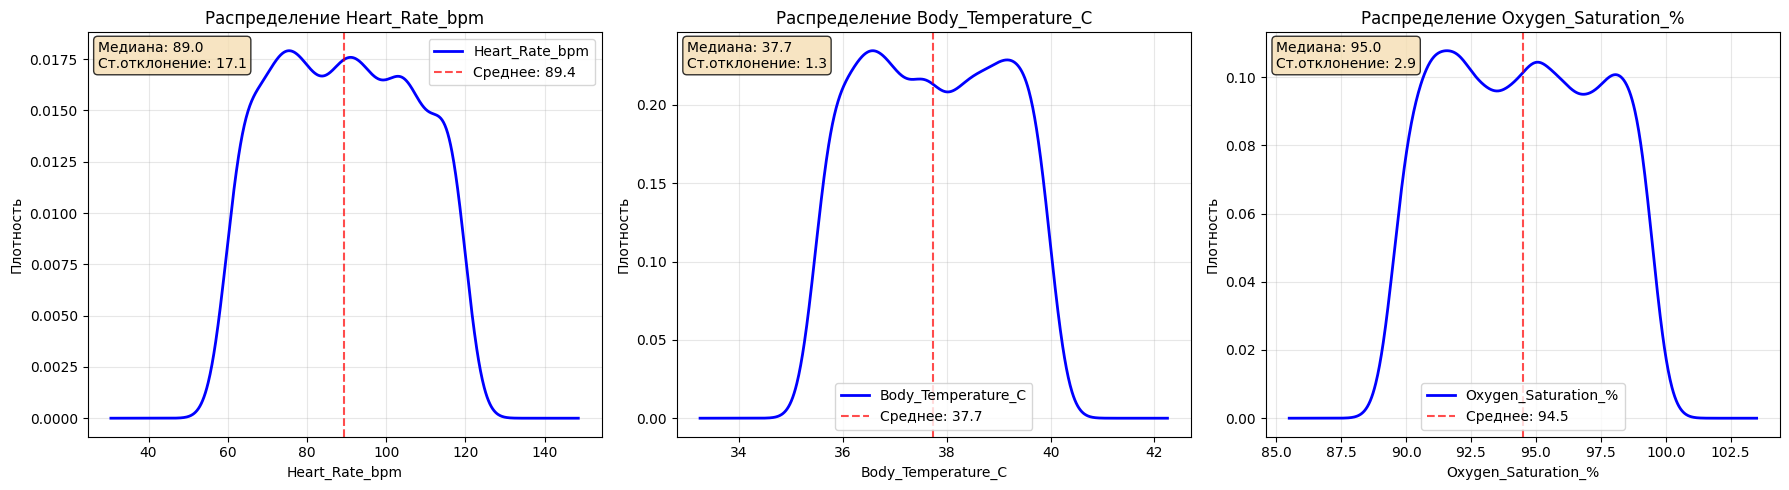


Heart_Rate_bpm:
  Количество значений: 2000
  Среднее: 89.44
  Медиана: 89.00
  Стандартное отклонение: 17.14
  Минимум: 60.00
  Максимум: 119.00

Body_Temperature_C:
  Количество значений: 2000
  Среднее: 37.74
  Медиана: 37.70
  Стандартное отклонение: 1.31
  Минимум: 35.50
  Максимум: 40.00

Oxygen_Saturation_%:
  Количество значений: 2000
  Среднее: 94.49
  Медиана: 95.00
  Стандартное отклонение: 2.86
  Минимум: 90.00
  Максимум: 99.00


In [30]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

columns_to_plot = ['Heart_Rate_bpm', 'Body_Temperature_C', 'Oxygen_Saturation_%']

for i, column in enumerate(columns_to_plot):
    data = df[column].dropna()

    # KDE plot
    data.plot.kde(ax=axes[i], linewidth=2, color='blue')

    # вертикальную линию на среднем значении
    mean_val = data.mean()
    axes[i].axvline(mean_val, color='red', linestyle='--', alpha=0.7, label=f'Среднее: {mean_val:.1f}')

    axes[i].set_title(f'Распределение {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Плотность')
    axes[i].legend()
    axes[i].grid(True, alpha=0.3)

    stats_text = f'Медиана: {data.median():.1f}\nСт.отклонение: {data.std():.1f}'
    axes[i].text(0.02, 0.98, stats_text, transform=axes[i].transAxes,
                verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.show()

# статистику по каждому показателю

for column in columns_to_plot:
    data = df[column].dropna()
    print(f"\n{column}:")
    print(f"  Количество значений: {len(data)}")
    print(f"  Среднее: {data.mean():.2f}")
    print(f"  Медиана: {data.median():.2f}")
    print(f"  Стандартное отклонение: {data.std():.2f}")
    print(f"  Минимум: {data.min():.2f}")
    print(f"  Максимум: {data.max():.2f}")

In [27]:
# Выбираем 20 случайных значений
random_samples = df['Blood_Pressure_mmHg'].sample(n=20, random_state=42)

for i, value in enumerate(random_samples, 1):
    print(f"{i:2d}. {value}")

 1. 107/112
 2. 92/101
 3. 160/91
 4. 125/103
 5. 127/112
 6. 141/94
 7. 136/67
 8. 138/101
 9. 165/96
10. 106/80
11. 144/89
12. 138/81
13. 128/70
14. 126/117
15. 107/112
16. 128/118
17. 130/91
18. 120/104
19. 170/84
20. 158/76


In [34]:
df_processed = df.copy()

# разделение давления
def split_blood_pressure(bp_string):
    """
    Разделяет строку давления формата 'XXX/YY' на систолическое и диастолическое
    """
    if isinstance(bp_string, str) and '/' in bp_string:
        try:
            systolic, diastolic = bp_string.split('/')
            return int(systolic), int(diastolic)
        except (ValueError, TypeError):
            return None, None
    return None, None

# применяем функцию разделения
pressure_split = df_processed['Blood_Pressure_mmHg'].apply(split_blood_pressure)

# создаем новые столбцы
df_processed['Systolic_BP'] = pressure_split.apply(lambda x: x[0] if x[0] is not None else None)
df_processed['Diastolic_BP'] = pressure_split.apply(lambda x: x[1] if x[1] is not None else None)

df = df_processed

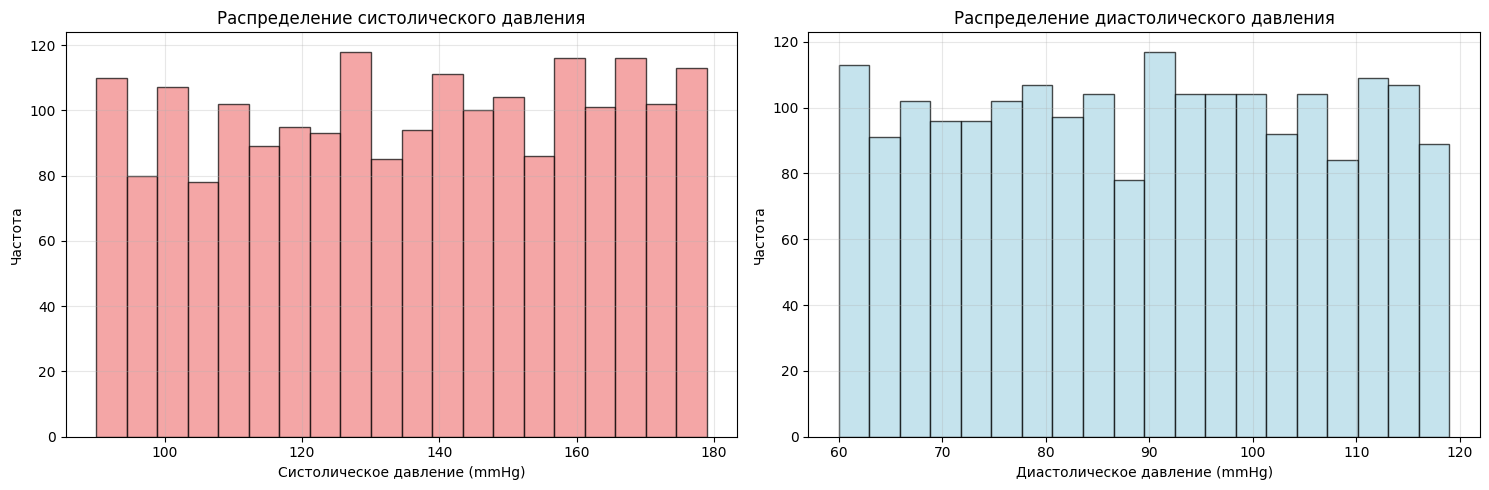

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
# гистограмма систолического давления
axes[0].hist(df_processed['Systolic_BP'].dropna(), bins=20, alpha=0.7, color='lightcoral', edgecolor='black')
axes[0].set_title('Распределение систолического давления')
axes[0].set_xlabel('Систолическое давление (mmHg)')
axes[0].set_ylabel('Частота')
axes[0].grid(True, alpha=0.3)

# гистограмма диастолического давления
axes[1].hist(df_processed['Diastolic_BP'].dropna(), bins=20, alpha=0.7, color='lightblue', edgecolor='black')
axes[1].set_title('Распределение диастолического давления')
axes[1].set_xlabel('Диастолическое давление (mmHg)')
axes[1].set_ylabel('Частота')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


анализ распределений параметров по диагнозам...
найдено диагнозов: ['Flu', 'Healthy', 'Bronchitis', 'Cold', 'Pneumonia']

анализ диагноза: Flu


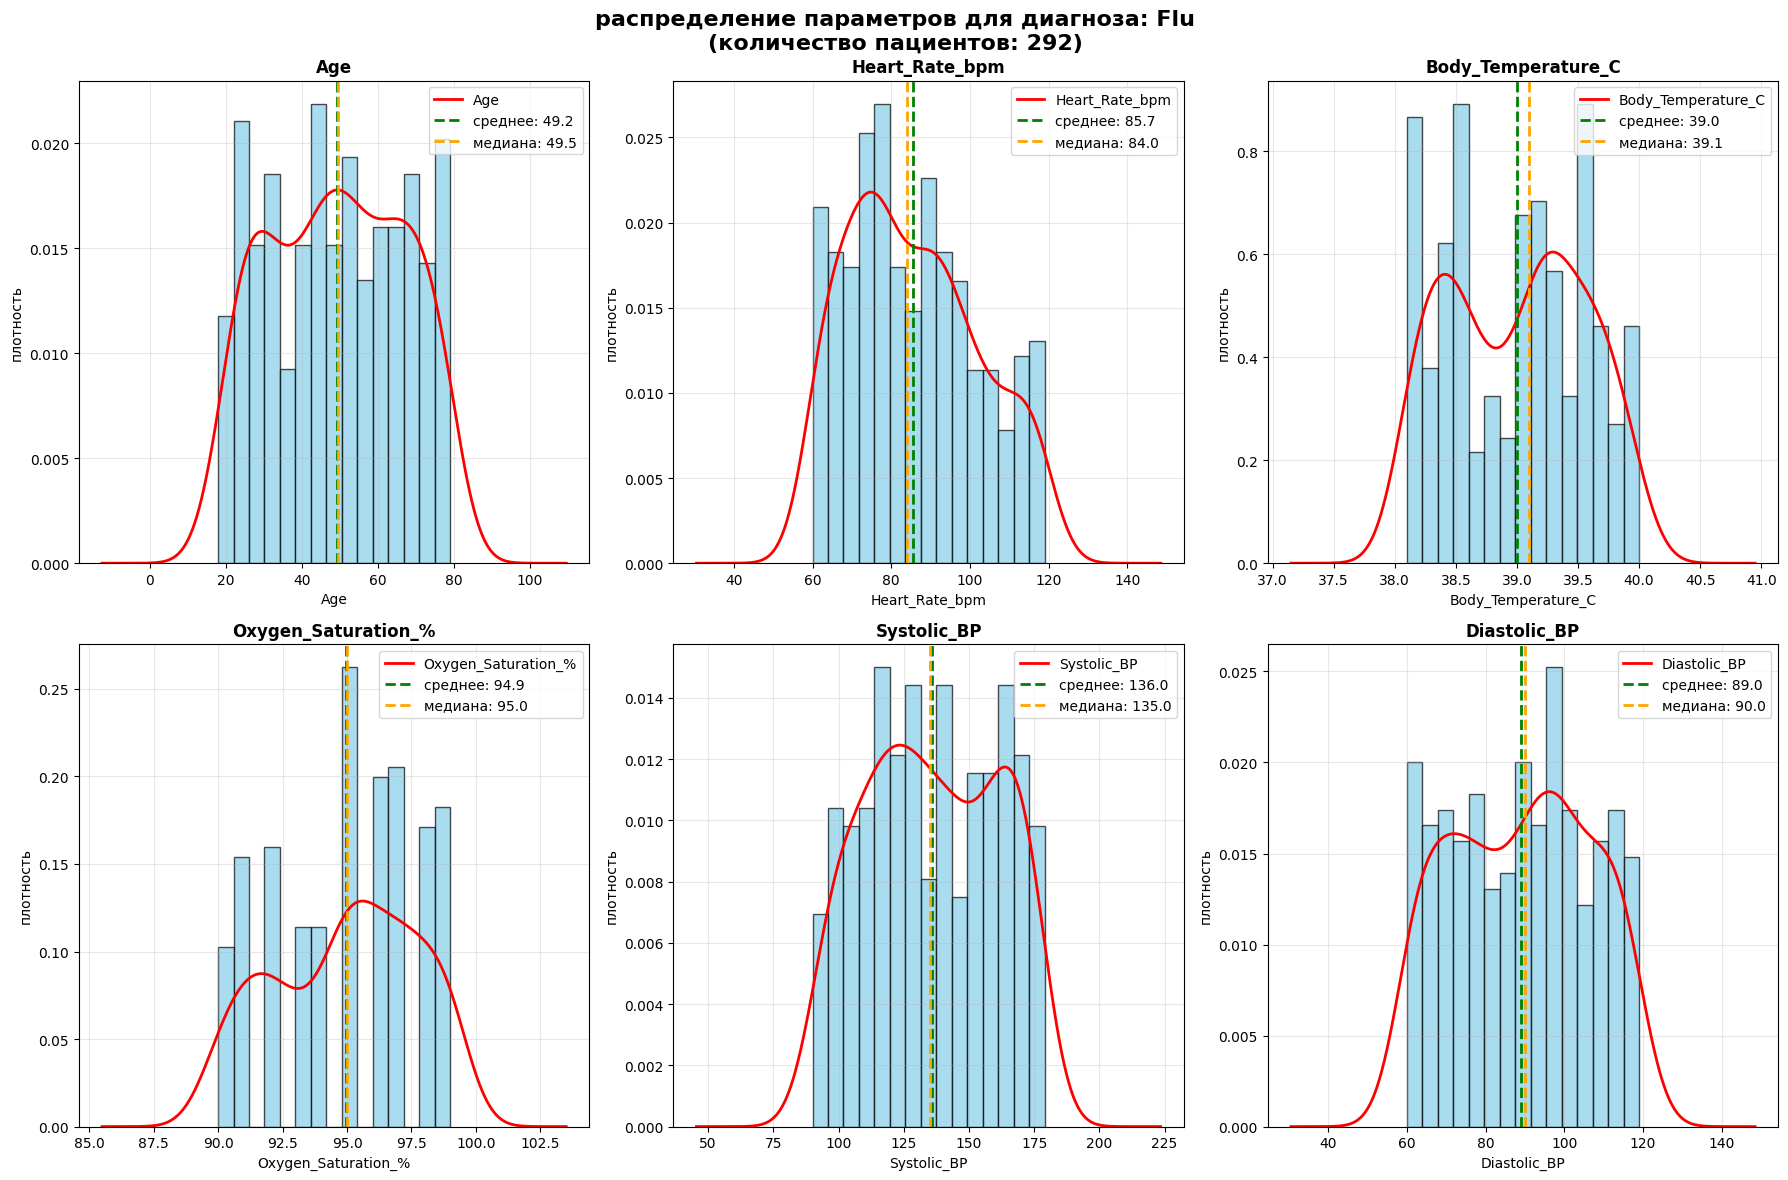

статистика для 'Flu':


,Age,Heart_Rate_bpm,Body_Temperature_C,Oxygen_Saturation_%,Systolic_BP,Diastolic_BP
count,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000
mean,49.178082,85.667808,38.999658,94.941781,136.003425,89.023973
std,17.511777,16.465185,0.557023,2.745825,25.146239,17.459706
min,18.000000,60.000000,38.100000,90.000000,90.000000,60.000000
25%,34.000000,72.000000,38.500000,92.750000,116.000000,73.000000
50%,49.500000,84.000000,39.100000,95.000000,135.000000,90.000000
75%,64.000000,97.250000,39.500000,97.000000,159.250000,103.000000
max,79.000000,119.000000,40.000000,99.000000,179.000000,119.000000



анализ диагноза: Healthy


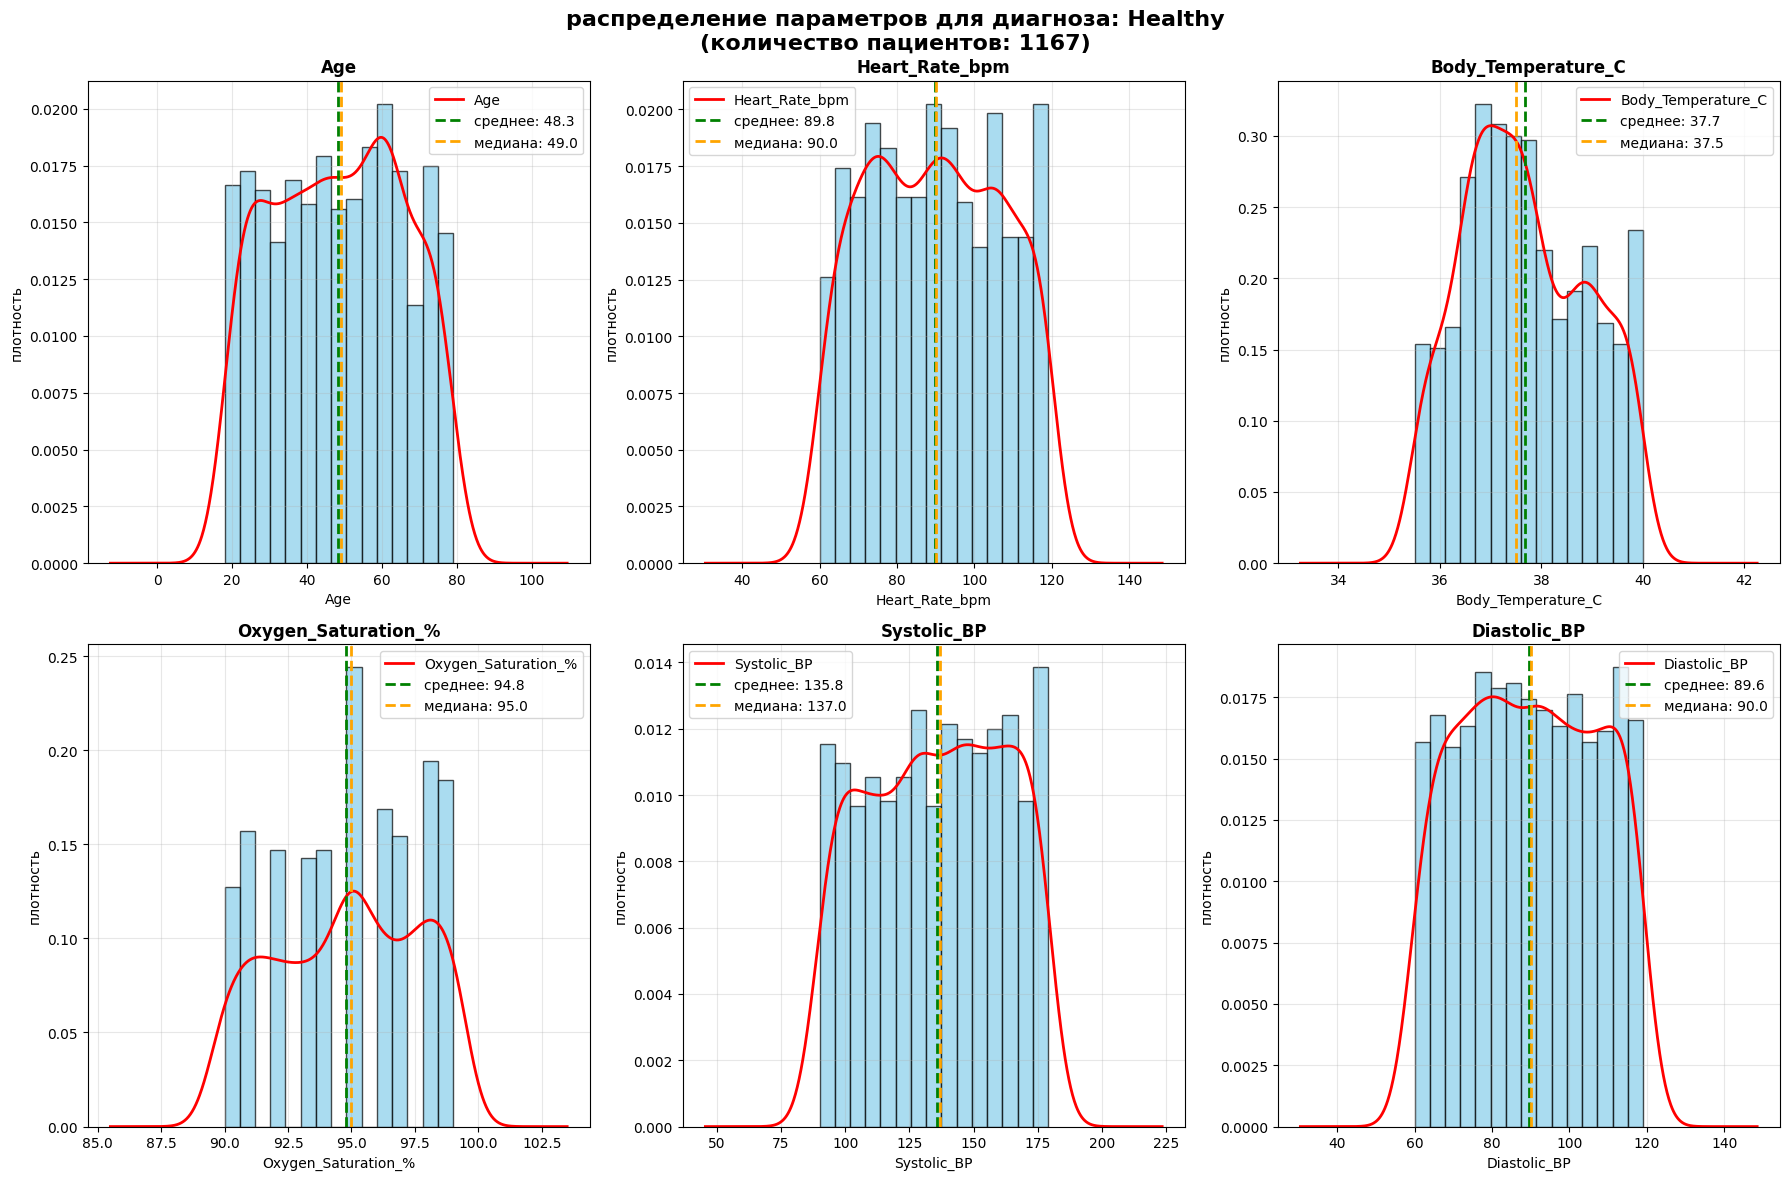

статистика для 'Healthy':


,Age,Heart_Rate_bpm,Body_Temperature_C,Oxygen_Saturation_%,Systolic_BP,Diastolic_BP
count,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000
mean,48.328192,89.804627,37.670094,94.795201,135.760069,89.632391
std,17.223665,17.092962,1.202686,2.809573,26.222933,17.195708
min,18.000000,60.000000,35.500000,90.000000,90.000000,60.000000
25%,34.000000,75.000000,36.700000,92.000000,113.000000,75.000000
50%,49.000000,90.000000,37.500000,95.000000,137.000000,90.000000
75%,62.000000,105.000000,38.700000,97.000000,158.500000,105.000000
max,79.000000,119.000000,40.000000,99.000000,179.000000,119.000000



анализ диагноза: Bronchitis


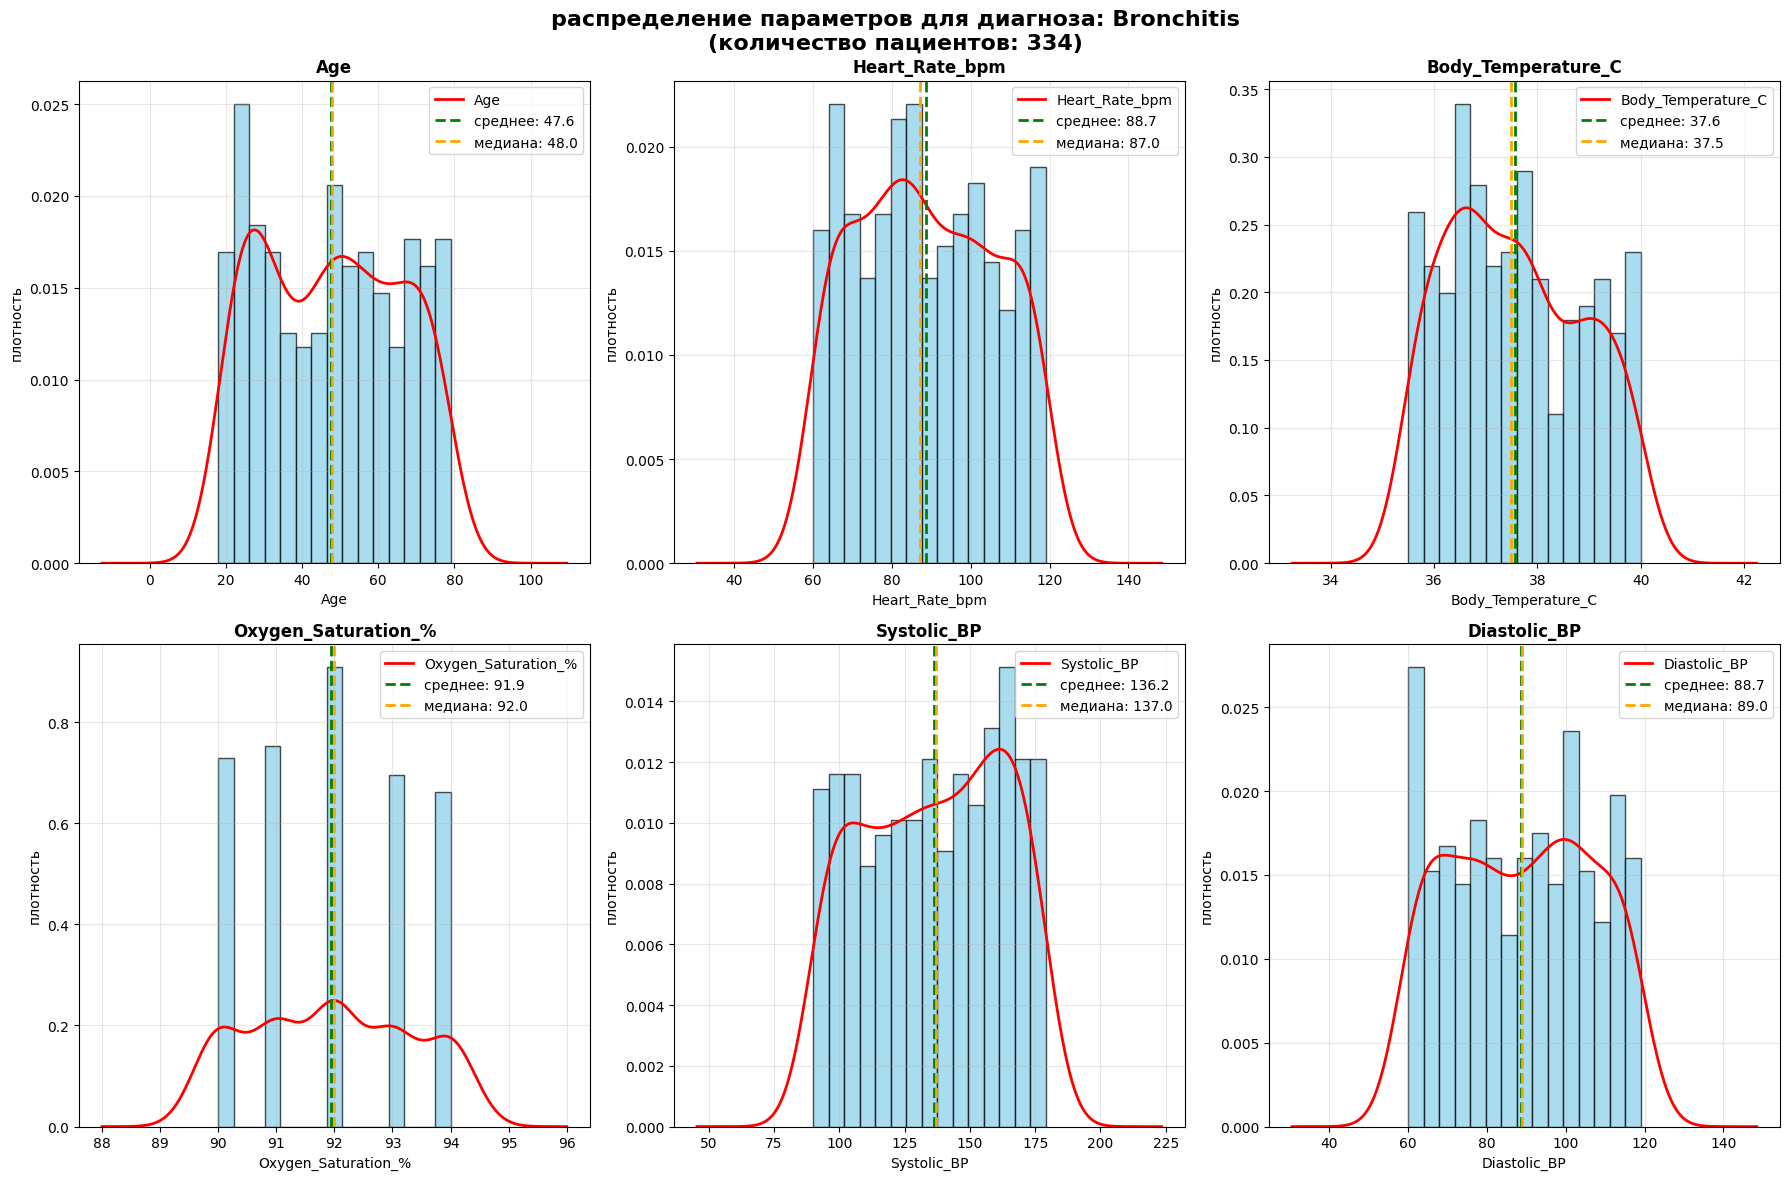

статистика для 'Bronchitis':


,Age,Heart_Rate_bpm,Body_Temperature_C,Oxygen_Saturation_%,Systolic_BP,Diastolic_BP
count,334.00000,334.000000,334.000000,334.000000,334.000000,334.000000
mean,47.61976,88.691617,37.563174,91.949102,136.245509,88.712575
std,18.00106,17.339330,1.302270,1.369043,26.508419,17.943723
min,18.00000,60.000000,35.500000,90.000000,90.000000,60.000000
25%,31.00000,75.000000,36.500000,91.000000,113.000000,73.000000
50%,48.00000,87.000000,37.500000,92.000000,137.000000,89.000000
75%,63.00000,103.000000,38.700000,93.000000,159.750000,103.000000
max,79.00000,119.000000,40.000000,94.000000,179.000000,119.000000



анализ диагноза: Cold


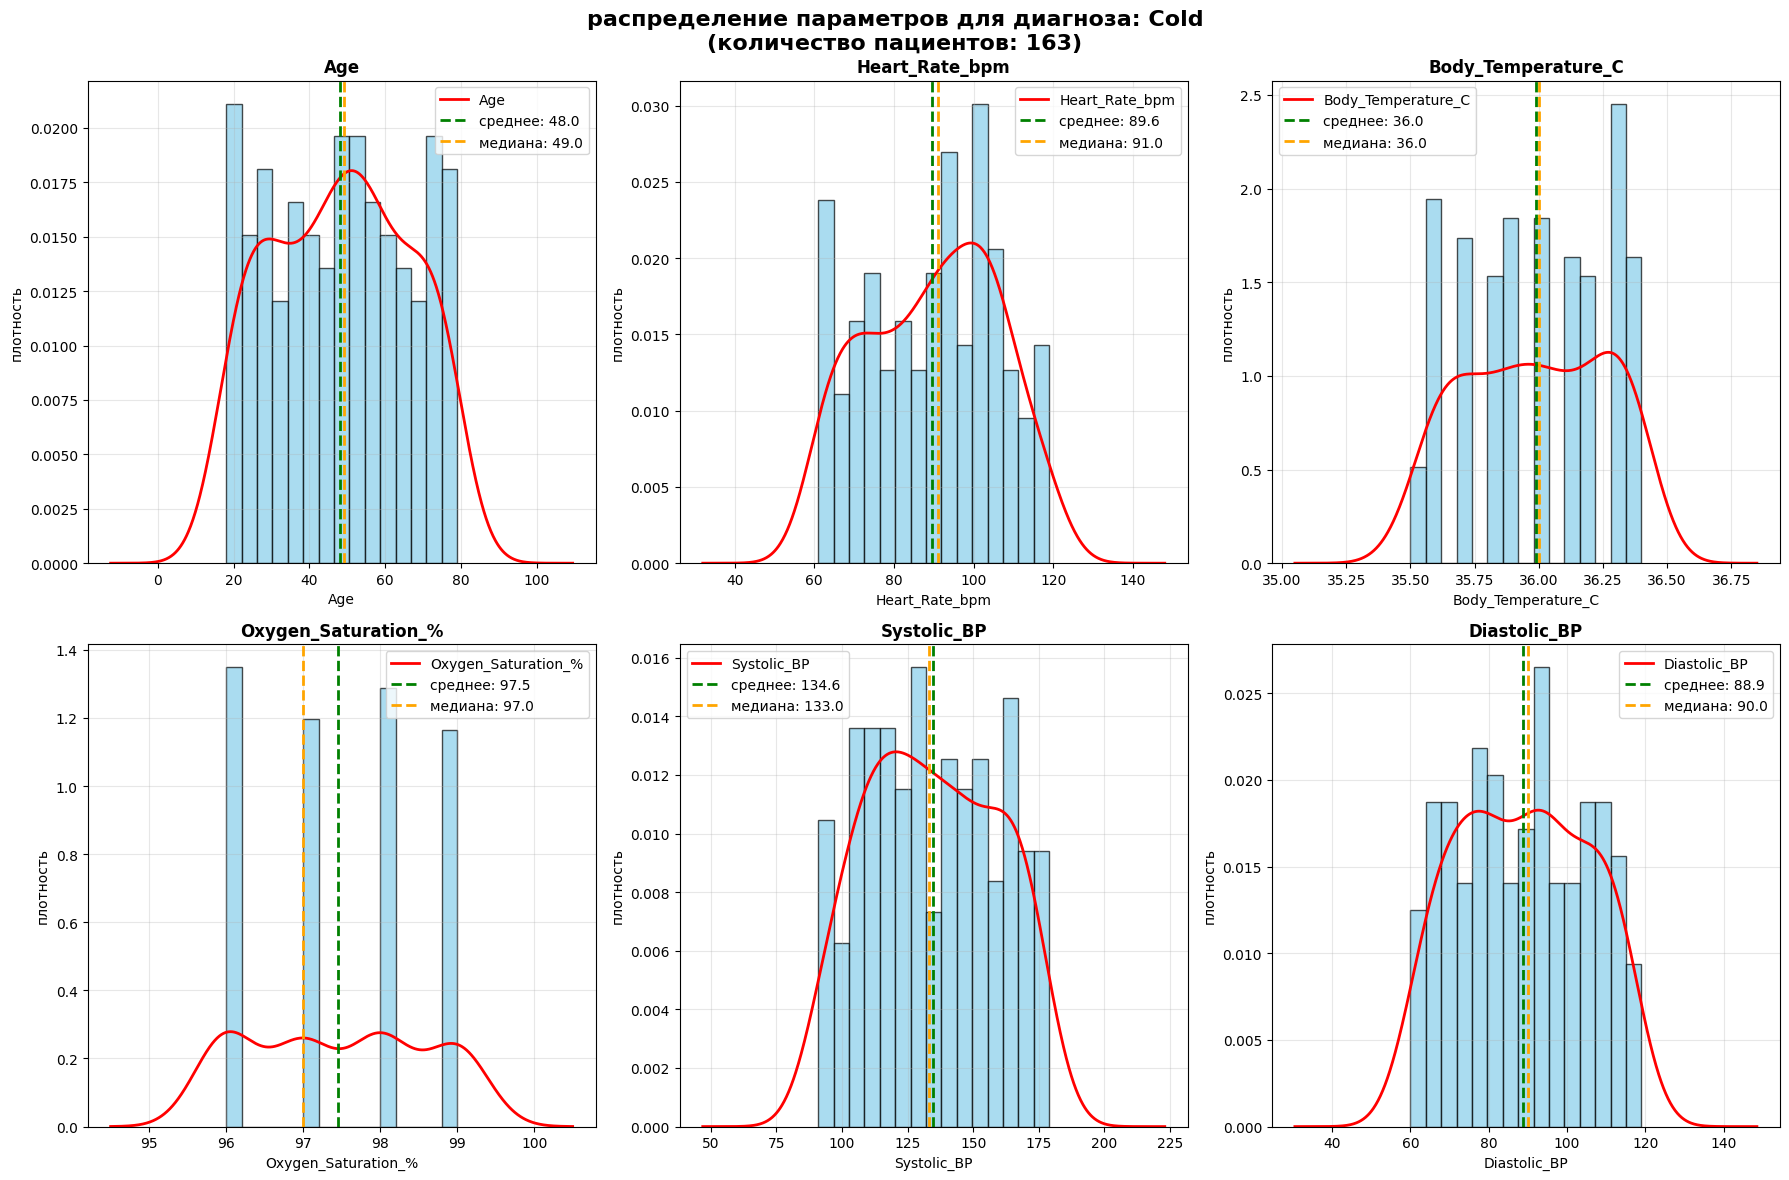

статистика для 'Cold':


,Age,Heart_Rate_bpm,Body_Temperature_C,Oxygen_Saturation_%,Systolic_BP,Diastolic_BP
count,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000
mean,48.036810,89.619632,35.988957,97.453988,134.558282,88.852761
std,17.982464,16.378701,0.272846,1.123280,24.669694,16.516820
min,18.000000,61.000000,35.500000,96.000000,91.000000,60.000000
25%,31.500000,75.000000,35.750000,96.000000,114.000000,75.000000
50%,49.000000,91.000000,36.000000,97.000000,133.000000,90.000000
75%,63.500000,103.000000,36.200000,98.000000,154.000000,103.000000
max,79.000000,119.000000,36.400000,99.000000,179.000000,119.000000



анализ диагноза: Pneumonia


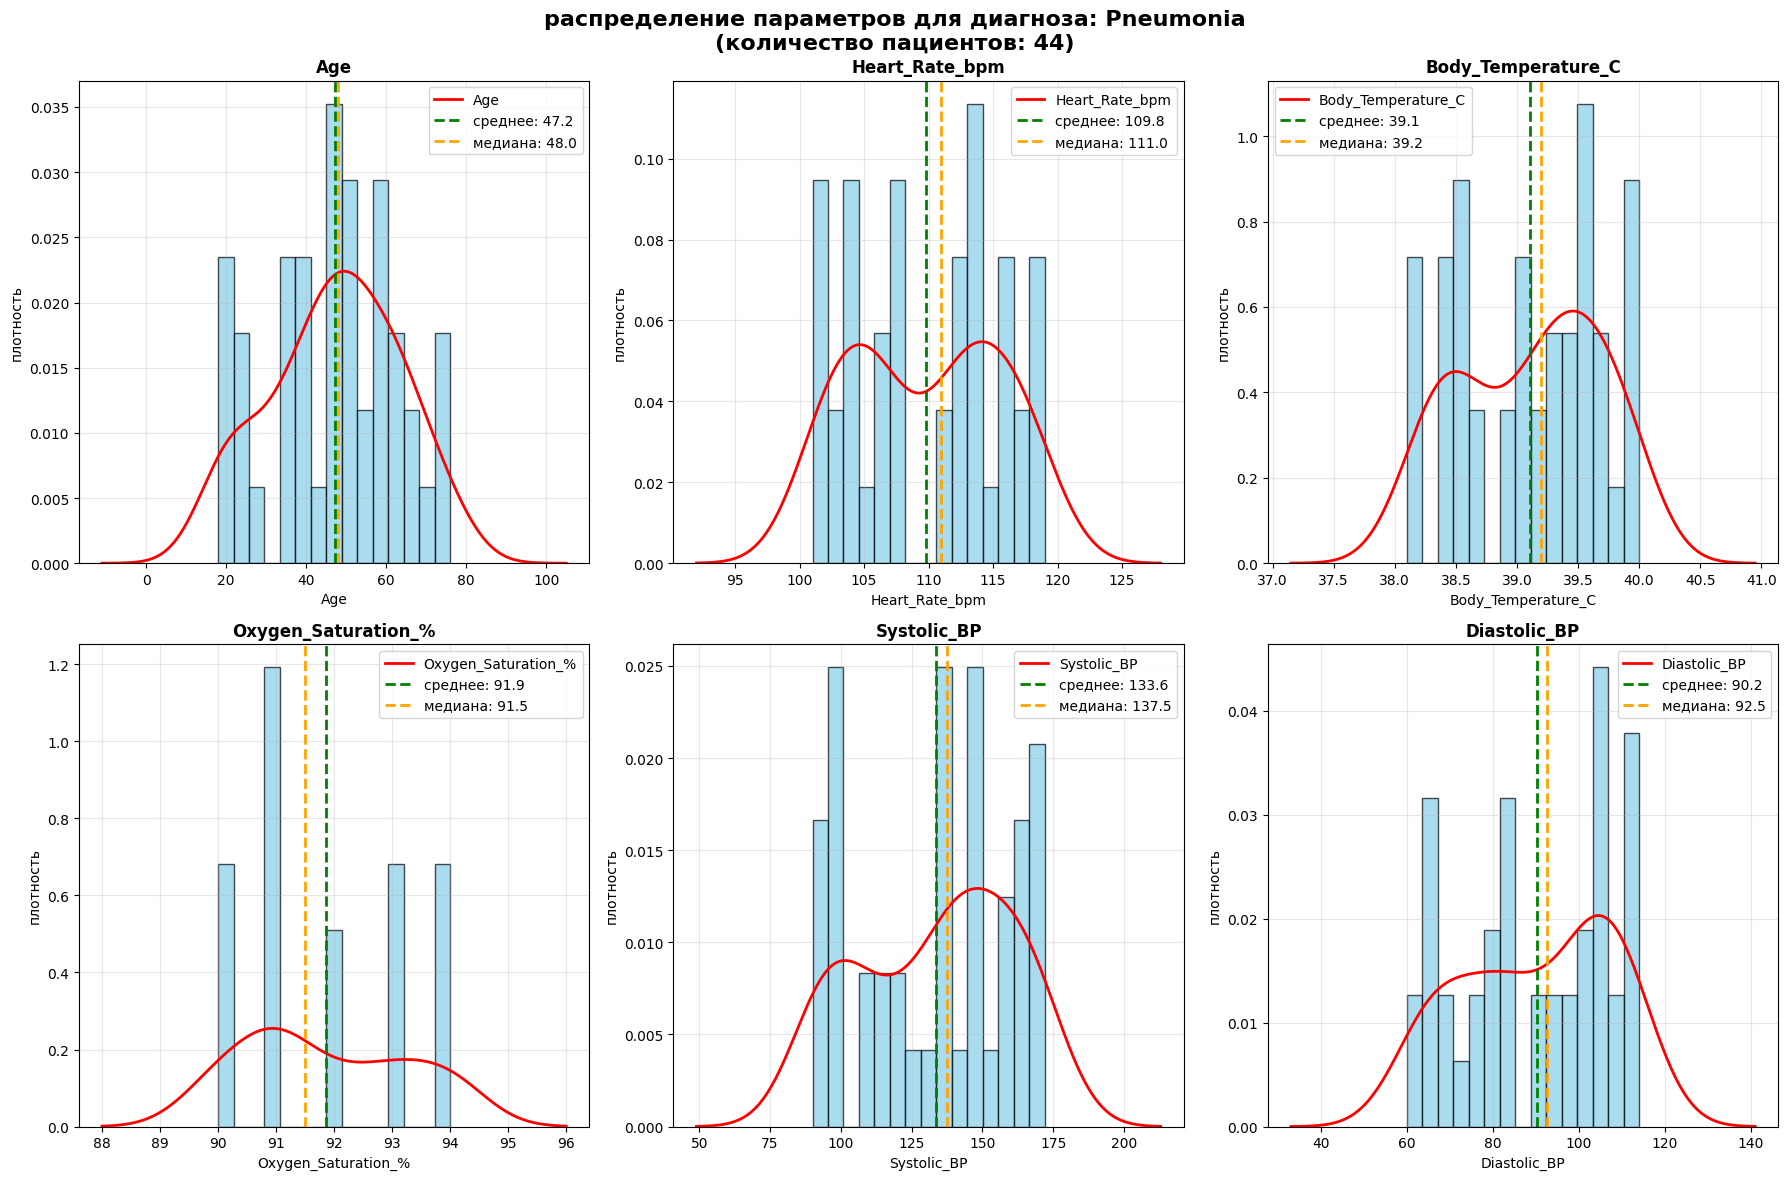

статистика для 'Pneumonia':


,Age,Heart_Rate_bpm,Body_Temperature_C,Oxygen_Saturation_%,Systolic_BP,Diastolic_BP
count,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000
mean,47.181818,109.772727,39.109091,91.863636,133.613636,90.181818
std,15.933397,5.725762,0.575394,1.407470,26.731408,17.222582
min,18.000000,101.000000,38.100000,90.000000,90.000000,60.000000
25%,37.000000,104.000000,38.500000,91.000000,109.000000,76.000000
50%,48.000000,111.000000,39.200000,91.500000,137.500000,92.500000
75%,59.000000,114.250000,39.600000,93.000000,157.500000,105.000000
max,76.000000,119.000000,40.000000,94.000000,172.000000,114.000000



сравнительный анализ распределений по диагнозам


/tmp/ipython-input-2889274093.py:77: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_plot = ax1.boxplot(diagnosis_data_list, labels=diagnoses, patch_artist=True)


<Figure size 1200x600 with 0 Axes>

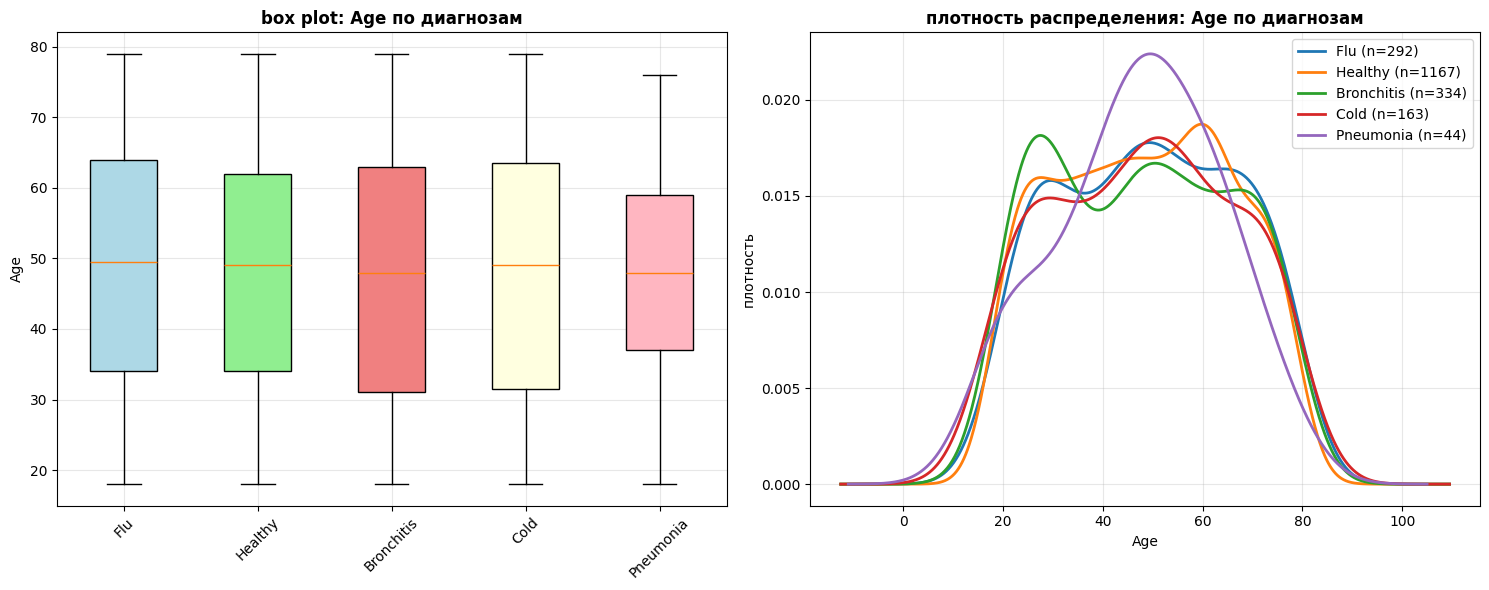

/tmp/ipython-input-2889274093.py:77: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_plot = ax1.boxplot(diagnosis_data_list, labels=diagnoses, patch_artist=True)


<Figure size 1200x600 with 0 Axes>

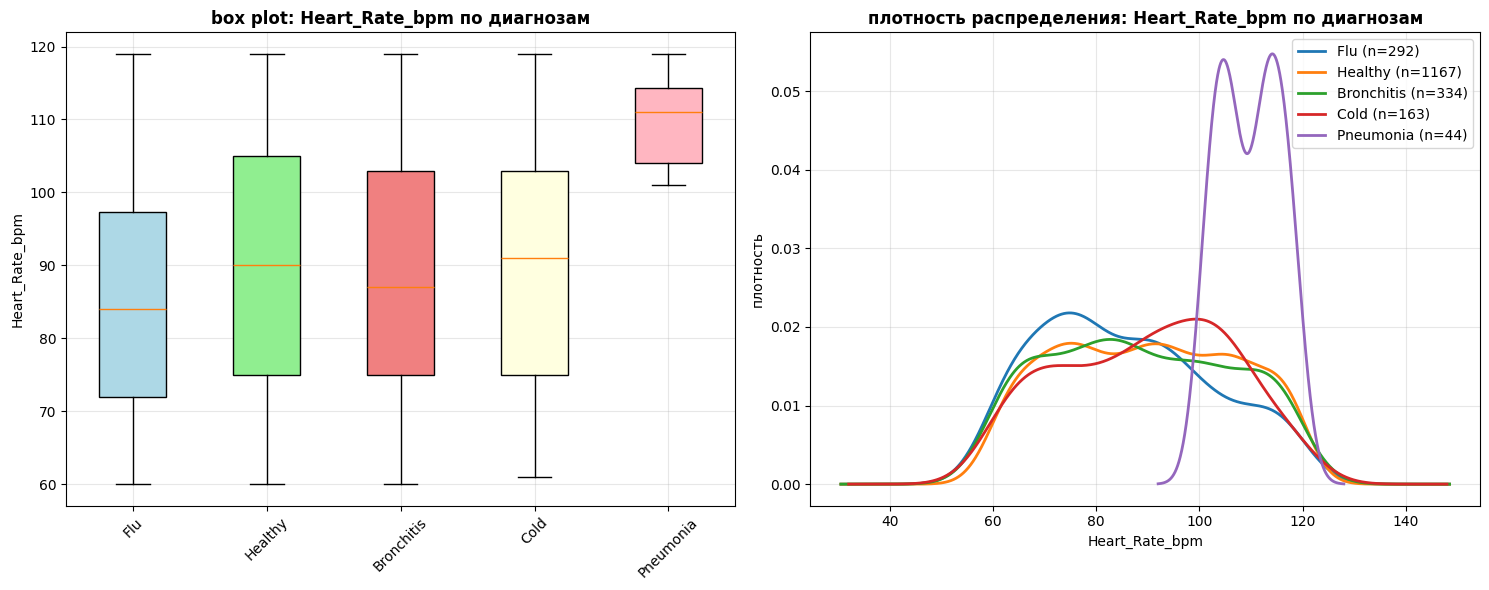

/tmp/ipython-input-2889274093.py:77: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_plot = ax1.boxplot(diagnosis_data_list, labels=diagnoses, patch_artist=True)


<Figure size 1200x600 with 0 Axes>

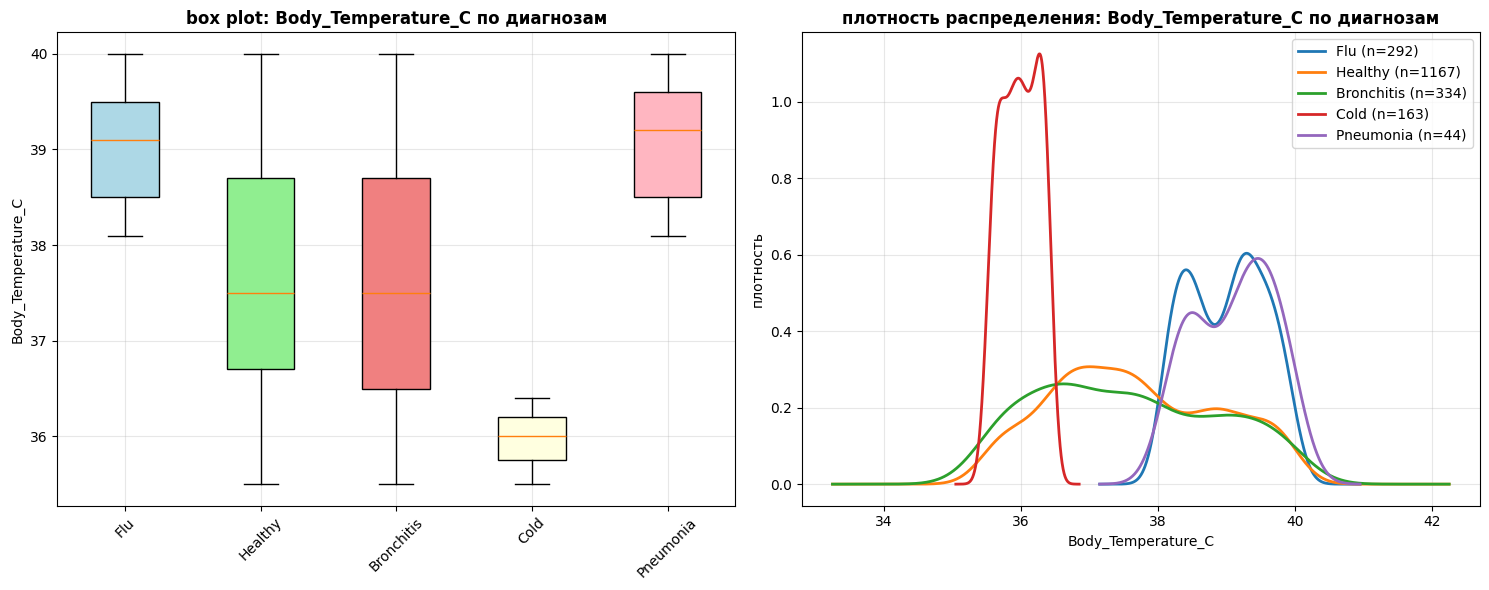

/tmp/ipython-input-2889274093.py:77: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_plot = ax1.boxplot(diagnosis_data_list, labels=diagnoses, patch_artist=True)


<Figure size 1200x600 with 0 Axes>

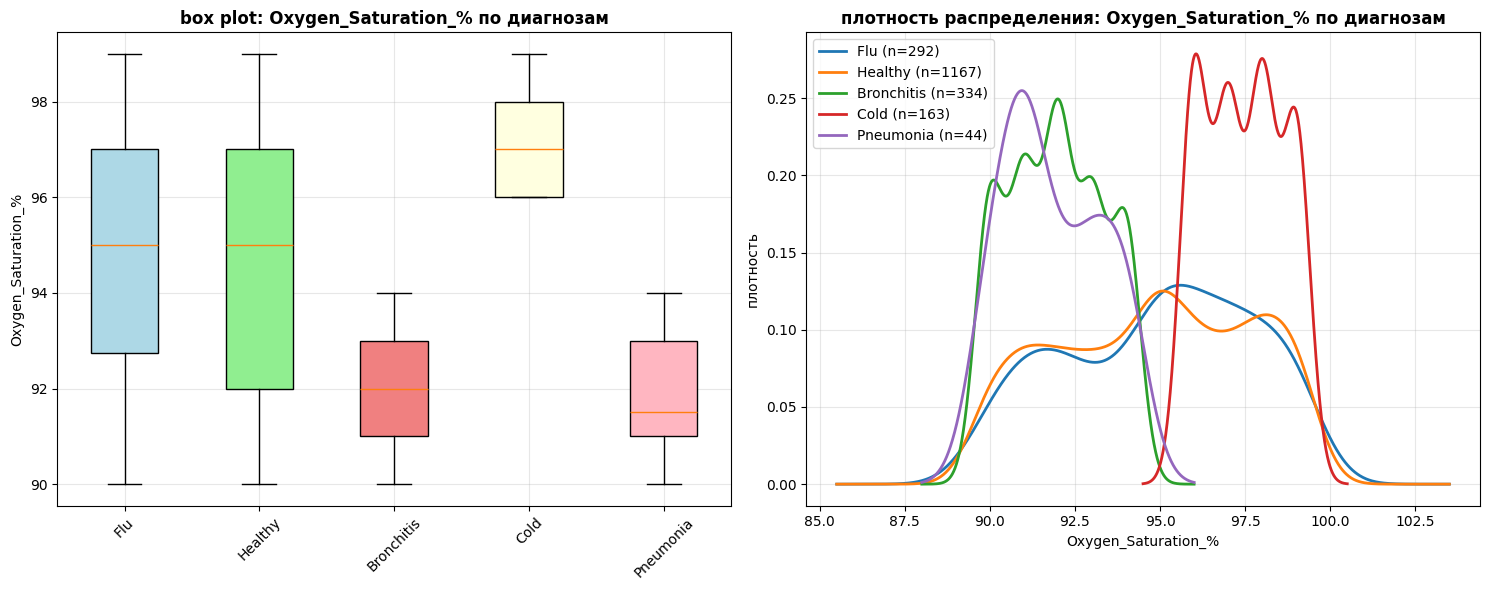

/tmp/ipython-input-2889274093.py:77: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_plot = ax1.boxplot(diagnosis_data_list, labels=diagnoses, patch_artist=True)


<Figure size 1200x600 with 0 Axes>

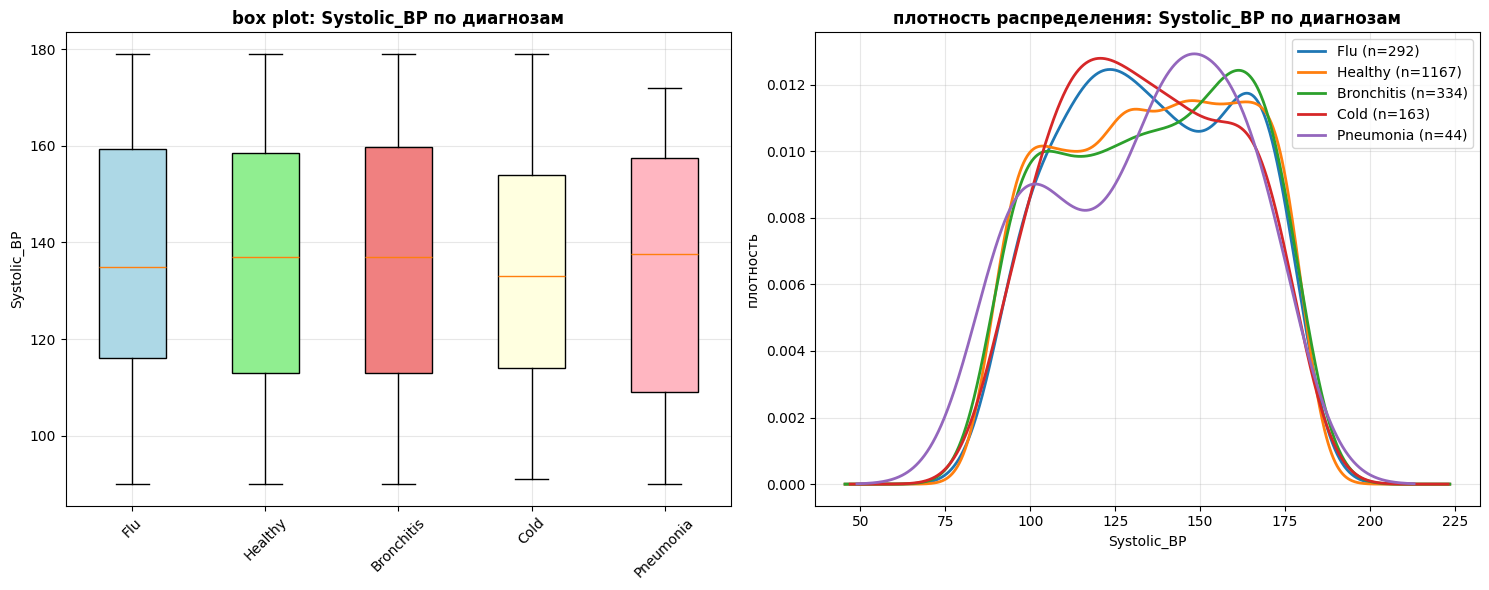

/tmp/ipython-input-2889274093.py:77: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_plot = ax1.boxplot(diagnosis_data_list, labels=diagnoses, patch_artist=True)


<Figure size 1200x600 with 0 Axes>

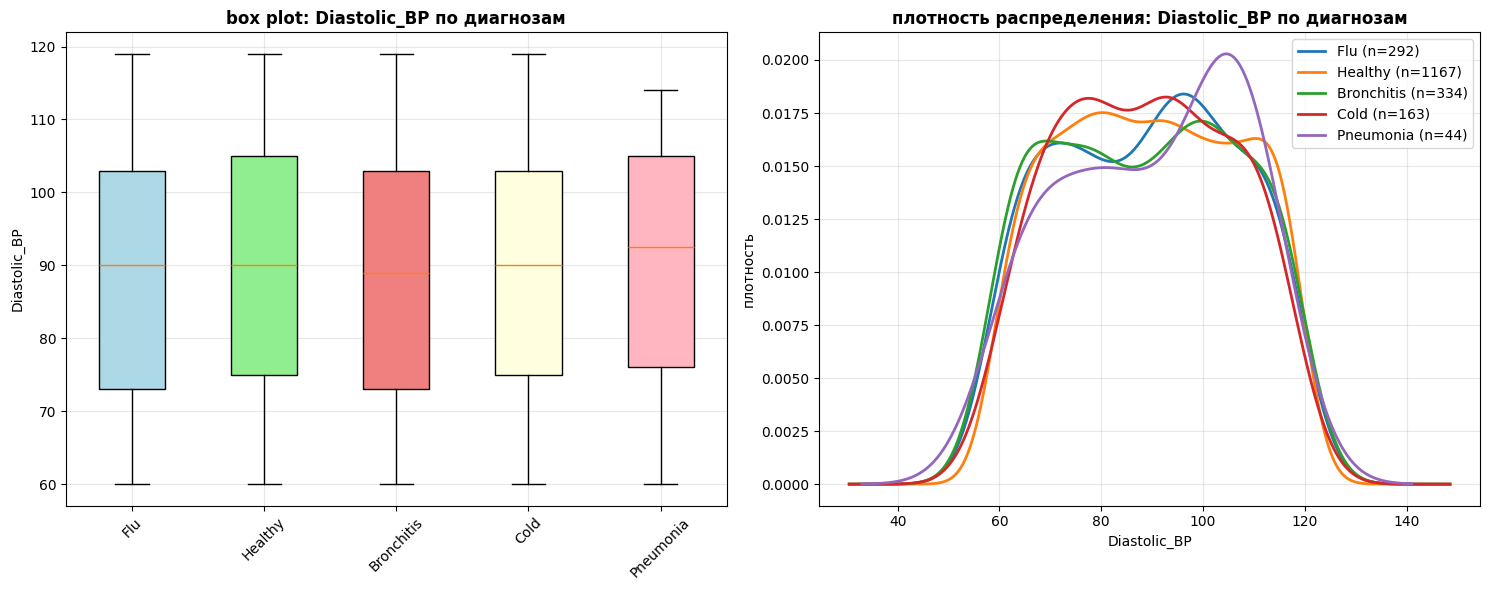


анализ категориальных переменных по диагнозам

распределение 'Gender' по диагнозам:


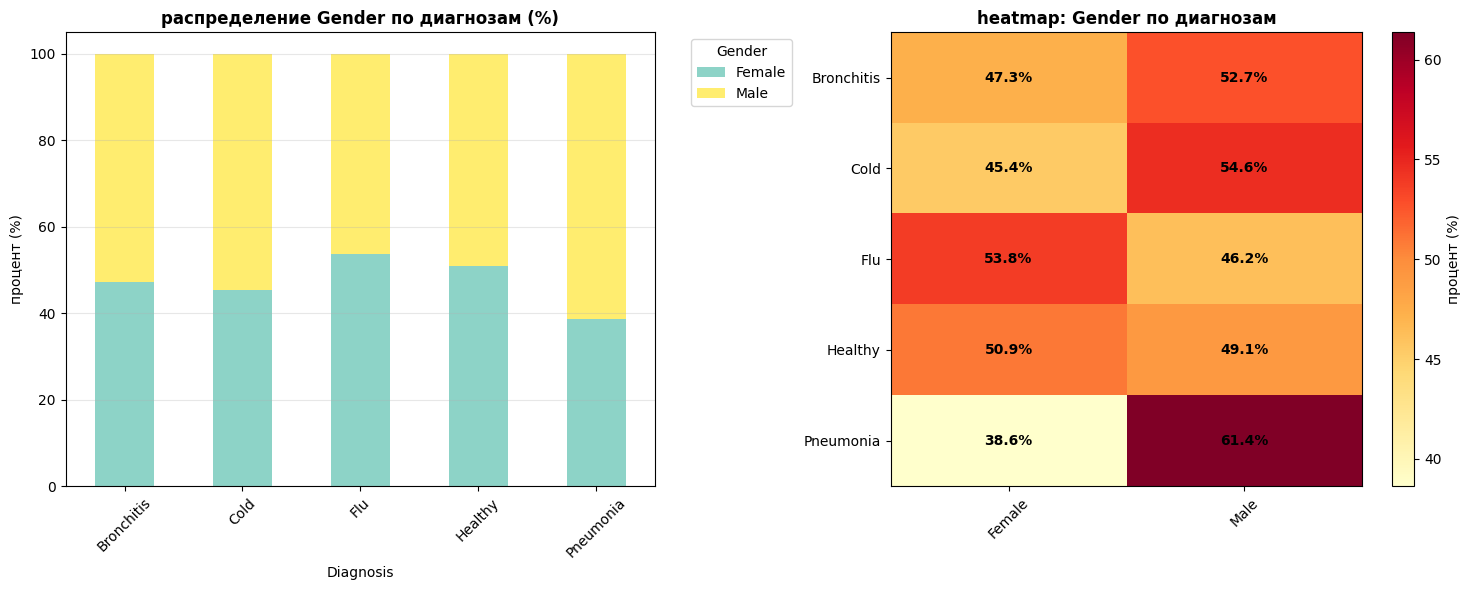

Gender,Female,Male
Diagnosis,,
Bronchitis,47.3,52.7
Cold,45.4,54.6
Flu,53.8,46.2
Healthy,50.9,49.1
Pneumonia,38.6,61.4



распределение 'Severity' по диагнозам:


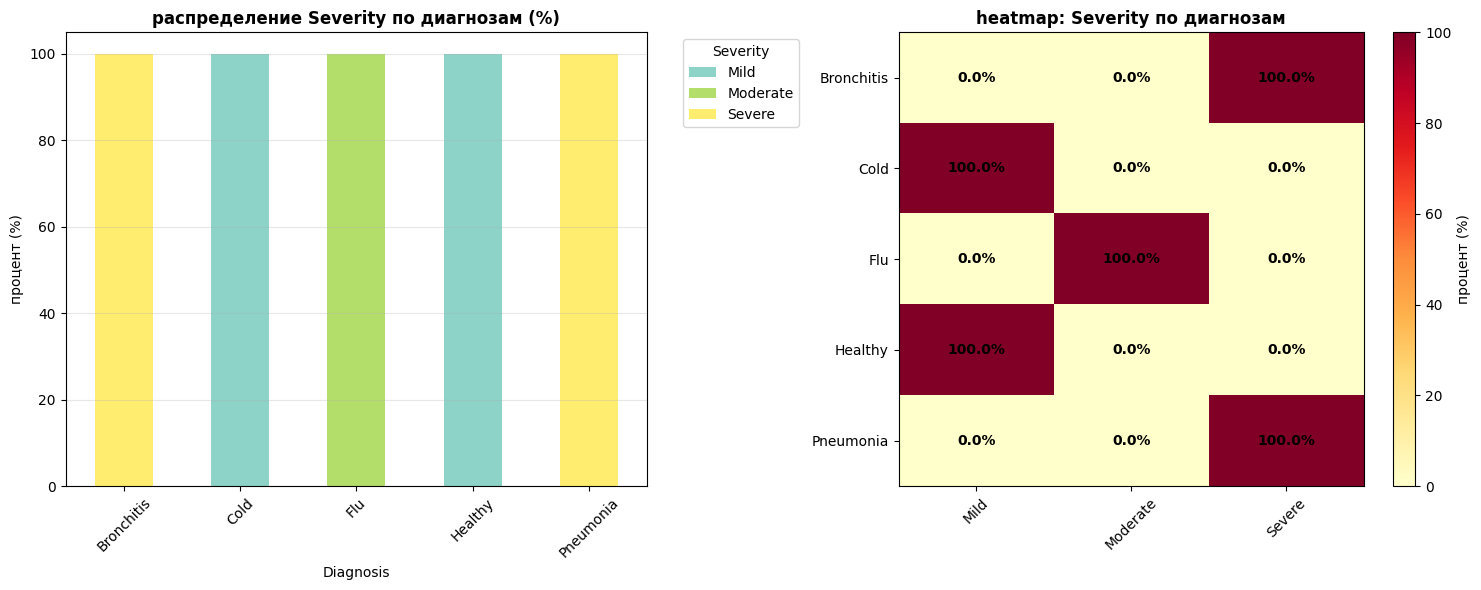

Severity,Mild,Moderate,Severe
Diagnosis,,,
Bronchitis,0.0,0.0,100.0
Cold,100.0,0.0,0.0
Flu,0.0,100.0,0.0
Healthy,100.0,0.0,0.0
Pneumonia,0.0,0.0,100.0



распределение 'Treatment_Plan' по диагнозам:


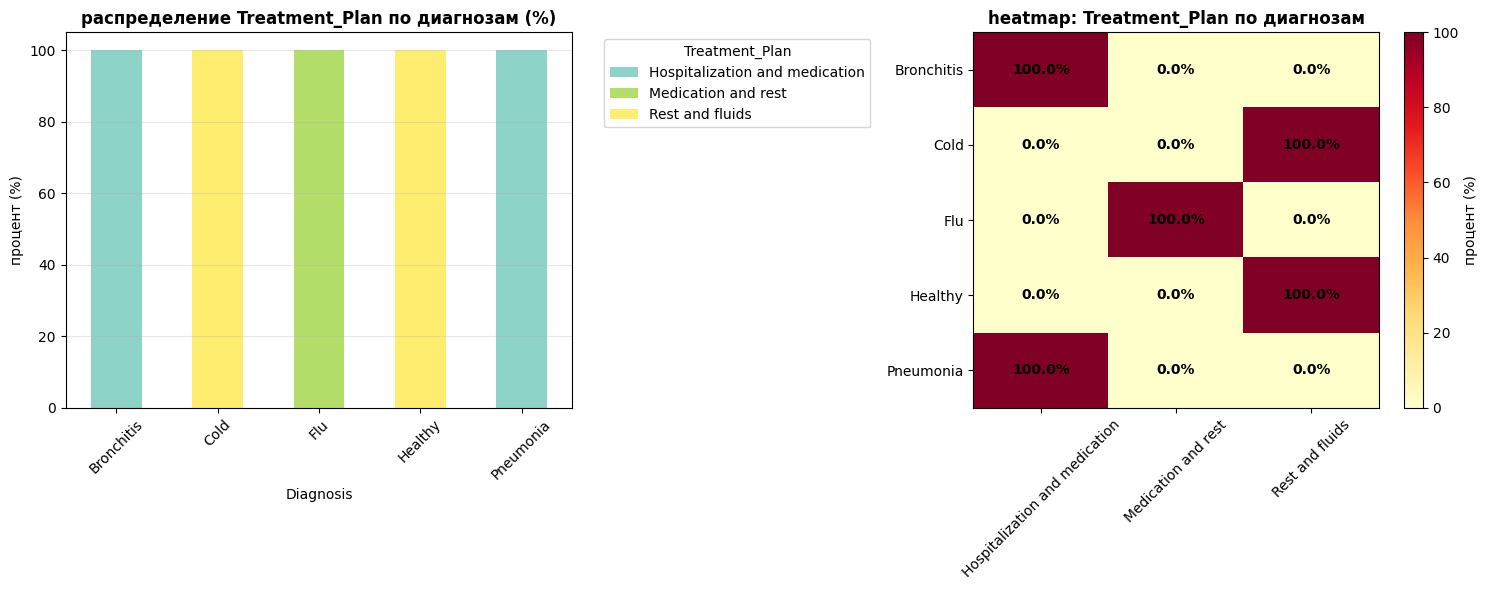

Treatment_Plan,Hospitalization and medication,Medication and rest,Rest and fluids
Diagnosis,,,
Bronchitis,100.0,0.0,0.0
Cold,0.0,0.0,100.0
Flu,0.0,100.0,0.0
Healthy,0.0,0.0,100.0
Pneumonia,100.0,0.0,0.0



статистический анализ различий между диагнозам

анализ различий по параметру: Age
   f-статистика: 0.3672
   p-value: 0.8321
   статистически значимых различий не обнаружено (p ≥ 0.05)
   средние значения по диагнозам:
     Flu: 49.18
     Healthy: 48.33
     Bronchitis: 47.62
     Cold: 48.04
     Pneumonia: 47.18

анализ различий по параметру: Heart_Rate_bpm
   f-статистика: 20.0482
   p-value: 0.0000
   статистически значимые различия (p < 0.05)
   средние значения по диагнозам:
     Flu: 85.67
     Healthy: 89.80
     Bronchitis: 88.69
     Cold: 89.62
     Pneumonia: 109.77

анализ различий по параметру: Body_Temperature_C
   f-статистика: 223.6324
   p-value: 0.0000
   статистически значимые различия (p < 0.05)
   средние значения по диагнозам:
     Flu: 39.00
     Healthy: 37.67
     Bronchitis: 37.56
     Cold: 35.99
     Pneumonia: 39.11

анализ различий по параметру: Oxygen_Saturation_%
   f-статистика: 164.4758
   p-value: 0.0000
   статистически значимые различия (p < 0.05

In [36]:
# анализ распределений параметров по диагнозам
print("анализ распределений параметров по диагнозам...")

# получаем список уникальных диагнозов
diagnoses = df['Diagnosis'].unique()
print(f"найдено диагнозов: {list(diagnoses)}")

# числовые параметры для анализа
numeric_columns = ['Age', 'Heart_Rate_bpm', 'Body_Temperature_C', 'Oxygen_Saturation_%',
                   'Systolic_BP', 'Diastolic_BP']

# создаем графики для каждого диагноза
for diagnosis in diagnoses:
    print(f"\nанализ диагноза: {diagnosis}")
    print("=" * 50)

    # фильтруем данные по диагнозу
    diagnosis_data = df[df['Diagnosis'] == diagnosis]

    # создаем subplot для всех числовых параметров
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle(f'распределение параметров для диагноза: {diagnosis}\n(количество пациентов: {len(diagnosis_data)})',
                 fontsize=16, fontweight='bold')

    axes = axes.flatten()

    for i, column in enumerate(numeric_columns):
        if i < len(axes):
            # гистограмма с kde
            axes[i].hist(diagnosis_data[column], bins=15, alpha=0.7, color='skyblue',
                        edgecolor='black', density=True)

            # добавляем kde
            diagnosis_data[column].plot.density(ax=axes[i], color='red', linewidth=2)

            # добавляем вертикальную линию для среднего
            mean_val = diagnosis_data[column].mean()
            axes[i].axvline(mean_val, color='green', linestyle='--', linewidth=2,
                           label=f'среднее: {mean_val:.1f}')

            # добавляем вертикальную линию для медианы
            median_val = diagnosis_data[column].median()
            axes[i].axvline(median_val, color='orange', linestyle='--', linewidth=2,
                           label=f'медиана: {median_val:.1f}')

            axes[i].set_title(f'{column}', fontweight='bold')
            axes[i].set_xlabel(column)
            axes[i].set_ylabel('плотность')
            axes[i].legend()
            axes[i].grid(True, alpha=0.3)

    # удаляем пустые subplots
    for i in range(len(numeric_columns), len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()

    # выводим статистику по диагнозу
    print(f"статистика для '{diagnosis}':")
    display(diagnosis_data[numeric_columns].describe())

# дополнительный анализ: сравнение распределений всех параметров по диагнозам
print("\n" + "="*80)
print("сравнительный анализ распределений по диагнозам")
print("="*80)

# создаем отдельные графики для каждого параметра с наложением распределений по диагнозам
for column in numeric_columns:
    plt.figure(figsize=(12, 6))

    # создаем subplot с двумя графиками
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # график 1: box plot по диагнозам
    diagnosis_data_list = [df[df['Diagnosis'] == diagnosis][column] for diagnosis in diagnoses]
    box_plot = ax1.boxplot(diagnosis_data_list, labels=diagnoses, patch_artist=True)

    # раскрашиваем box plots
    colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightyellow', 'lightpink']
    for patch, color in zip(box_plot['boxes'], colors[:len(diagnoses)]):
        patch.set_facecolor(color)

    ax1.set_title(f'box plot: {column} по диагнозам', fontweight='bold')
    ax1.set_ylabel(column)
    ax1.grid(True, alpha=0.3)
    ax1.tick_params(axis='x', rotation=45)

    # график 2: наложенные распределения (kde)
    for diagnosis in diagnoses:
        diagnosis_data = df[df['Diagnosis'] == diagnosis][column]
        diagnosis_data.plot.density(ax=ax2, label=f'{diagnosis} (n={len(diagnosis_data)})', linewidth=2)

    ax2.set_title(f'плотность распределения: {column} по диагнозам', fontweight='bold')
    ax2.set_xlabel(column)
    ax2.set_ylabel('плотность')
    ax2.legend()
    ax2.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

# анализ категориальных переменных по диагнозам
print("\nанализ категориальных переменных по диагнозам")
print("="*60)

categorical_columns = ['Gender', 'Severity', 'Treatment_Plan']

for cat_column in categorical_columns:
    print(f"\nраспределение '{cat_column}' по диагнозам:")

    # создаем cross-tabulation
    cross_tab = pd.crosstab(df['Diagnosis'], df[cat_column], normalize='index') * 100

    # визуализация
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # stacked bar chart
    cross_tab.plot(kind='bar', stacked=True, ax=ax1, colormap='Set3')
    ax1.set_title(f'распределение {cat_column} по диагнозам (%)', fontweight='bold')
    ax1.set_ylabel('процент (%)')
    ax1.legend(title=cat_column, bbox_to_anchor=(1.05, 1), loc='upper left')
    ax1.tick_params(axis='x', rotation=45)
    ax1.grid(True, alpha=0.3, axis='y')

    # heatmap
    im = ax2.imshow(cross_tab.values, cmap='YlOrRd', aspect='auto')
    ax2.set_xticks(range(len(cross_tab.columns)))
    ax2.set_yticks(range(len(cross_tab.index)))
    ax2.set_xticklabels(cross_tab.columns, rotation=45)
    ax2.set_yticklabels(cross_tab.index)
    ax2.set_title(f'heatmap: {cat_column} по диагнозам', fontweight='bold')

    # добавляем значения в heatmap
    for i in range(len(cross_tab.index)):
        for j in range(len(cross_tab.columns)):
            ax2.text(j, i, f'{cross_tab.iloc[i, j]:.1f}%',
                    ha='center', va='center', fontweight='bold')

    plt.colorbar(im, ax=ax2, label='процент (%)')
    plt.tight_layout()
    plt.show()

    # выводим таблицу
    display(cross_tab.round(1))

# статистический анализ различий между диагнозами
print("\nстатистический анализ различий между диагнозам")
print("="*60)

from scipy.stats import f_oneway

for column in numeric_columns:
    print(f"\nанализ различий по параметру: {column}")

    # собираем данные по всем диагнозам
    groups = [df[df['Diagnosis'] == diagnosis][column] for diagnosis in diagnoses]

    # проверяем, что во всех группах есть данные
    groups = [group for group in groups if len(group) > 0]

    if len(groups) >= 2:
        # one-way anova test
        f_stat, p_value = f_oneway(*groups)

        print(f"   f-статистика: {f_stat:.4f}")
        print(f"   p-value: {p_value:.4f}")

        if p_value < 0.05:
            print(f"   статистически значимые различия (p < 0.05)")
        else:
            print(f"   статистически значимых различий не обнаружено (p ≥ 0.05)")

        # средние значения по диагнозам
        print(f"   средние значения по диагнозам:")
        for diagnosis in diagnoses:
            mean_val = df[df['Diagnosis'] == diagnosis][column].mean()
            print(f"     {diagnosis}: {mean_val:.2f}")
    else:
        print(f"   недостаточно данных для статистического теста")



In [41]:
# анализ корреляций между параметрами, тяжестью и диагнозами
print("анализ корреляций между параметрами, тяжестью и диагнозами")

# создаем копию dataframe для обработки
df_corr = df.copy()

# преобразуем категориальные переменные в числовые для корреляционного анализа
# диагнозы
diagnosis_mapping = {diagnosis: i for i, diagnosis in enumerate(df_corr['Diagnosis'].unique())}
df_corr['Diagnosis_numeric'] = df_corr['Diagnosis'].map(diagnosis_mapping)

# тяжесть
severity_mapping = {'Mild': 0, 'Moderate': 1, 'Severe': 2}
df_corr['Severity_numeric'] = df_corr['Severity'].map(severity_mapping)

# пол
gender_mapping = {'Male': 0, 'Female': 1}
df_corr['Gender_numeric'] = df_corr['Gender'].map(gender_mapping)

# план лечения
treatment_mapping = {treatment: i for i, treatment in enumerate(df_corr['Treatment_Plan'].unique())}
df_corr['Treatment_numeric'] = df_corr['Treatment_Plan'].map(treatment_mapping)

# выбираем числовые переменные для корреляционного анализа
correlation_columns = ['Age', 'Heart_Rate_bpm', 'Body_Temperature_C', 'Oxygen_Saturation_%',
                      'Systolic_BP', 'Diastolic_BP', 'Diagnosis_numeric', 'Severity_numeric',
                      'Gender_numeric']

# создаем матрицу корреляций
correlation_matrix = df_corr[correlation_columns].corr()

# переименовываем столбцы для лучшей читаемости
column_names = ['возраст', 'пульс', 'температура', 'сатурация', 'систолическое',
                'диастолическое', 'диагноз', 'тяжесть', 'пол']
correlation_matrix.columns = column_names
correlation_matrix.index = column_names

print("\nматрица корреляций:")
display(correlation_matrix.round(3))

анализ корреляций между параметрами, тяжестью и диагнозами

матрица корреляций:


,возраст,пульс,температура,сатурация,систолическое,диастолическое,диагноз,тяжесть,пол
возраст,1.000,-0.011,0.002,0.038,-0.002,0.004,-0.023,-0.010,-0.001
пульс,-0.011,1.000,-0.000,0.023,-0.016,0.036,0.119,0.007,0.004
температура,0.002,-0.000,1.000,0.010,0.007,0.004,-0.355,0.178,0.026
сатурация,0.038,0.023,0.010,1.000,0.011,0.031,-0.072,-0.397,0.007
систолическое,-0.002,-0.016,0.007,0.011,1.000,0.015,-0.012,0.006,0.002
диастолическое,0.004,0.036,0.004,0.031,0.015,1.000,-0.005,-0.016,-0.063
диагноз,-0.023,0.119,-0.355,-0.072,-0.012,-0.005,1.000,0.271,-0.057
тяжесть,-0.010,0.007,0.178,-0.397,0.006,-0.016,0.271,1.000,-0.021
пол,-0.001,0.004,0.026,0.007,0.002,-0.063,-0.057,-0.021,1.000


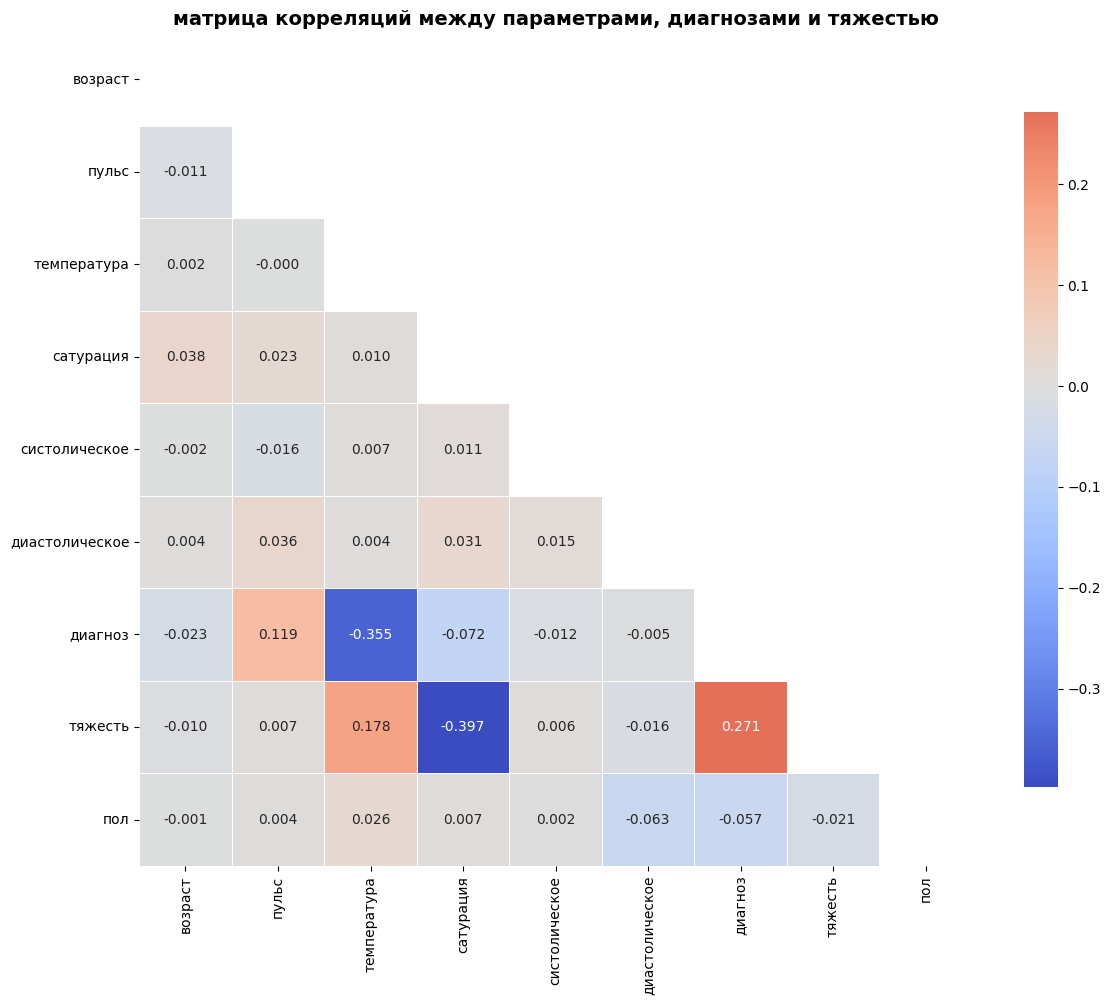

In [42]:
# матрица корреляций
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
heatmap = sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm',
                     center=0, square=True, linewidths=0.5, fmt='.3f',
                     cbar_kws={'shrink': 0.8})

plt.title('матрица корреляций между параметрами, диагнозами и тяжестью', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [ ]:
# самые значимые связи между диагнозом и температурой , тяжесть и сатурация ,тяжесть и диагноз

In [43]:
# анализ корреляций с диагнозом
print("\nкорреляции с диагнозом:")
diagnosis_correlations = correlation_matrix['диагноз'].sort_values(ascending=False)
for param, corr in diagnosis_correlations.items():
    if param != 'диагноз':
        print(f"   {param}: {corr:.3f}")

# анализ корреляций с тяжестью
print("\nкорреляции с тяжестью:")
severity_correlations = correlation_matrix['тяжесть'].sort_values(ascending=False)
for param, corr in severity_correlations.items():
    if param != 'тяжесть':
        print(f"   {param}: {corr:.3f}")


корреляции с диагнозом:
   тяжесть: 0.271
   пульс: 0.119
   диастолическое: -0.005
   систолическое: -0.012
   возраст: -0.023
   пол: -0.057
   сатурация: -0.072
   температура: -0.355

корреляции с тяжестью:
   диагноз: 0.271
   температура: 0.178
   пульс: 0.007
   систолическое: 0.006
   возраст: -0.010
   диастолическое: -0.016
   пол: -0.021
   сатурация: -0.397


In [44]:
# статистическая значимость корреляций
print("\nстатистическая значимость корреляций:")
print("корреляции с диагнозом:")
for column in ['Age', 'Heart_Rate_bpm', 'Body_Temperature_C', 'Oxygen_Saturation_%',
               'Systolic_BP', 'Diastolic_BP', 'Severity_numeric']:
    if column in df_corr.columns:
        corr, p_value = pearsonr(df_corr['Diagnosis_numeric'], df_corr[column])
        significance = "***" if p_value < 0.001 else "**" if p_value < 0.01 else "*" if p_value < 0.05 else "незначимо"
        print(f"   {column}: r={corr:.3f}, p={p_value:.4f} {significance}")

print("\nкорреляции с тяжестью:")
for column in ['Age', 'Heart_Rate_bpm', 'Body_Temperature_C', 'Oxygen_Saturation_%',
               'Systolic_BP', 'Diastolic_BP', 'Diagnosis_numeric']:
    if column in df_corr.columns:
        corr, p_value = pearsonr(df_corr['Severity_numeric'], df_corr[column])
        significance = "***" if p_value < 0.001 else "**" if p_value < 0.01 else "*" if p_value < 0.05 else "незначимо"
        print(f"   {column}: r={corr:.3f}, p={p_value:.4f} {significance}")


статистическая значимость корреляций:
корреляции с диагнозом:
   Age: r=-0.023, p=0.3009 незначимо
   Heart_Rate_bpm: r=0.119, p=0.0000 ***
   Body_Temperature_C: r=-0.355, p=0.0000 ***
   Oxygen_Saturation_%: r=-0.072, p=0.0013 **
   Systolic_BP: r=-0.012, p=0.5776 незначимо
   Diastolic_BP: r=-0.005, p=0.8094 незначимо
   Severity_numeric: r=0.271, p=0.0000 ***

корреляции с тяжестью:
   Age: r=-0.010, p=0.6494 незначимо
   Heart_Rate_bpm: r=0.007, p=0.7558 незначимо
   Body_Temperature_C: r=0.178, p=0.0000 ***
   Oxygen_Saturation_%: r=-0.397, p=0.0000 ***
   Systolic_BP: r=0.006, p=0.7974 незначимо
   Diastolic_BP: r=-0.016, p=0.4771 незначимо
   Diagnosis_numeric: r=0.271, p=0.0000 ***


In [51]:
#данные могут быть использованы для диагностики заболеваний для медицинских учреждений, позволяющей ускорить процесс первичного осмотра пациентов
#может быть сделана многоклассовая классификация пациентов по заболеваниям (5 классов диагнозов) с дополнительной задачей классификации по тяжести состояния (3 класса).
#датасет содержит равномерный набор данных по возрасту и полу нет преобладания каких либо классов, все столбцы не содержат пропущенных и некоректных значений
#в датасете есть столбцы со значимыми корреляциями на основе которых можно строить предсказания

#вероятная метрика Macro-averaged F1-score важна сбалансированность между точностью (precision) для избежания ложных диагнозов и полнотой (recall) для выявления всех больных пациентов
#каждый диагноз одинаково важен